In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os

from scipy.stats import gaussian_kde


In [2]:
# Configurar el estilo de fuente global a 'serif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Palatino', 'Charter', 'serif']

In [3]:
# Lee el archivo de texto y crea un DataFrame
nombres_columnas = ['Estrella', 'TYC', '2MASS']
data = pd.read_csv('Nombres_de_Estrellas.txt', delimiter=' ', names=nombres_columnas, header=None)  # Si el archivo está tabulado, usa '\t' como separador
data

,Estrella,TYC,2MASS
0,Krich_1,TYC22-591-1,2MASSJ01030596+0434459
1,Krich_2,TYC26-777-1,2MASSJ01194936+0634115
2,Na_rich,TYC6908-1643-1,2MASSJ20320320-2332524
3,Nrich_1,TYC4686-2039-1,2MASSJ01575297-0316508
4,Nrich_2,TYC8517-1671-1,2MASSJ05120630-5913438
5,Nrich_3,TYC244-273-1,2MASSJ10022398+0216045
6,Nrich_4,TYC250-1352-1,2MASSJ10071742+0605101
7,Nrich_5,TYC269-474-1,2MASSJ11173689+0645217
8,Nrich_6,TYC7408-694-1,2MASSJ18461977-3021506
9,Nrich_7,TYC5256-183-1,2MASSJ23513172-0312308


|Star|	TYC  | Main ID | O. type | S. Type | Link |
| --- | --- | --- |---|---|---|
|Krich_1|	TYC22-591-1	    | TYC 22-591-1 | Star | | http://cdsportal.u-strasbg.fr/?target=%20TYC%2022-591-1|
|Krich_2|	TYC26-777-1   	| BD+05 169 | Red Giant Branch star Candidate | G5 | http://cdsportal.u-strasbg.fr/?target=TYC26-777-1 |
|Na_rich|	TYC6908-1643-1	| CD-23 16310 | Chemically Peculiar Star | | http://cdsportal.u-strasbg.fr/?target=TYC6908-1643-1|
|Nrich_1|	TYC4686-2039-1	| TYC4686-2039-1 | Red Giant Branch star | | http://cdsportal.u-strasbg.fr/?target=TYC4686-2039-1|
|Nrich_2|	TYC8517-1671-1	| TYC8517-1671-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC8517-1671-1 |
|Nrich_3|	TYC244-273-1	| TYC244-273-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC244-273-1|
|Nrich_4|	TYC250-1352-1	| TYC250-1352-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC250-1352-1 |
|Nrich_5|	TYC269-474-1	| TYC269-474-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC269-474-1 |
|Nrich_6|	TYC7408-694-1	| TYC7408-694-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC7408-694-1 |
|Nrich_7|	TYC5256-183-1	| BD-04 5966 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC5256-183-1 |
|Nrich_8|	TYC8525-512-1	| TYC8525-512-1 | Star | | http://cdsportal.u-strasbg.fr/?target=TYC8525-512-1 |
|Si_rich|	TYC5805-233-1	| BD-12 6172 | Chemically Peculiar Star | | http://cdsportal.u-strasbg.fr/?target=TYC5805-233-1|
|s-rich	|   TYC6524-876-1   | HD 55496 | Chemically Peculiar Star | CEMP-s | http://cdsportal.u-strasbg.fr/?target=TYC6524-876-1 |

Galactic ArchaeoLogIcaL ExcavatiOns (GALILEO). I. An updated census of APOGEE N-rich giants across the Milky Way.

FERNANDEZ-TRINCADO J.G., BEERS T.C., BARBUY B., MINNITI D., CHIAPPINI C., GARRO E.R., TANG B., ALVES-BRITO A., VILLANOVA S., GEISLER D., LANE R.R. and GONZALEZ DIAZ D.


https://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2022A%26A...663A.126F

In [9]:
data["Estrella"]

0     Krich_1
1     Krich_2
2     Na_rich
3     Nrich_1
4     Nrich_2
5     Nrich_3
6     Nrich_4
7     Nrich_5
8     Nrich_6
9     Nrich_7
10    Nrich_8
11    Si_rich
12     s-rich
Name: Estrella, dtype: object

In [11]:
columns = ["Star","Date","RV","err_RV","S/N"]
Estrella = {}
mean = []
range = []
std = []
sn_all = []
for i in data["Estrella"]:
    Estrella[i] = pd.read_csv(i+'.dat', delimiter='\t', names=columns, header=None)
    #print(Estrella[i])
    mean.append(np.mean(Estrella[i]["RV"]))
    range.append(np.max(Estrella[i]["RV"])-np.min(Estrella[i]["RV"]))
    std.append(np.std(Estrella[i]["RV"]))
    sn_all.append(list(Estrella[i]["S/N"]))

In [13]:
s_n_mean = []
for i in sn_all:
    s_n_mean.append(np.mean(i))
    print(np.mean(i))

17.0
34.25
38.5
18.75
27.8
28.5
22.666666666666668
29.833333333333332
34.0
25.5
20.333333333333332
34.578947368421055
93.0


In [16]:
np.mean(s_n_mean)

32.67017543859649

In [18]:
num_espec = 0
total = 0
for i in np.arange(len(data["Estrella"])):
    num_espec = (len(Estrella[data["Estrella"][i]]))
    #total = total + num_espec
    print(data["Estrella"][i],num_espec)

Krich_1 3
Krich_2 4
Na_rich 4
Nrich_1 4
Nrich_2 5
Nrich_3 6
Nrich_4 3
Nrich_5 6
Nrich_6 3
Nrich_7 8
Nrich_8 3
Si_rich 19
s-rich 8


Nrich_2
HIERARCH TARGET NAME = 'TYC8517-1671-1'                                        
HIERARCH MJD =    59609.15801362399                                            HIERARCH SHUTTER START DATE = '2022-01-30'      
RV      =            -264.7542                                                
RV_E    =               0.4392 
BJD_OUT =    2459609.658134369 

In [21]:
np.max(Estrella["Nrich_2"]["RV"])-np.min(Estrella["Nrich_2"]["RV"])

0.5861999999999981

In [23]:
np.mean(Estrella["Nrich_2"]["RV"])

48.70996

In [25]:
np.std(Estrella["Nrich_2"]["RV"])

0.20480380465215894

In [27]:
data["Estrella"]

0     Krich_1
1     Krich_2
2     Na_rich
3     Nrich_1
4     Nrich_2
5     Nrich_3
6     Nrich_4
7     Nrich_5
8     Nrich_6
9     Nrich_7
10    Nrich_8
11    Si_rich
12     s-rich
Name: Estrella, dtype: object

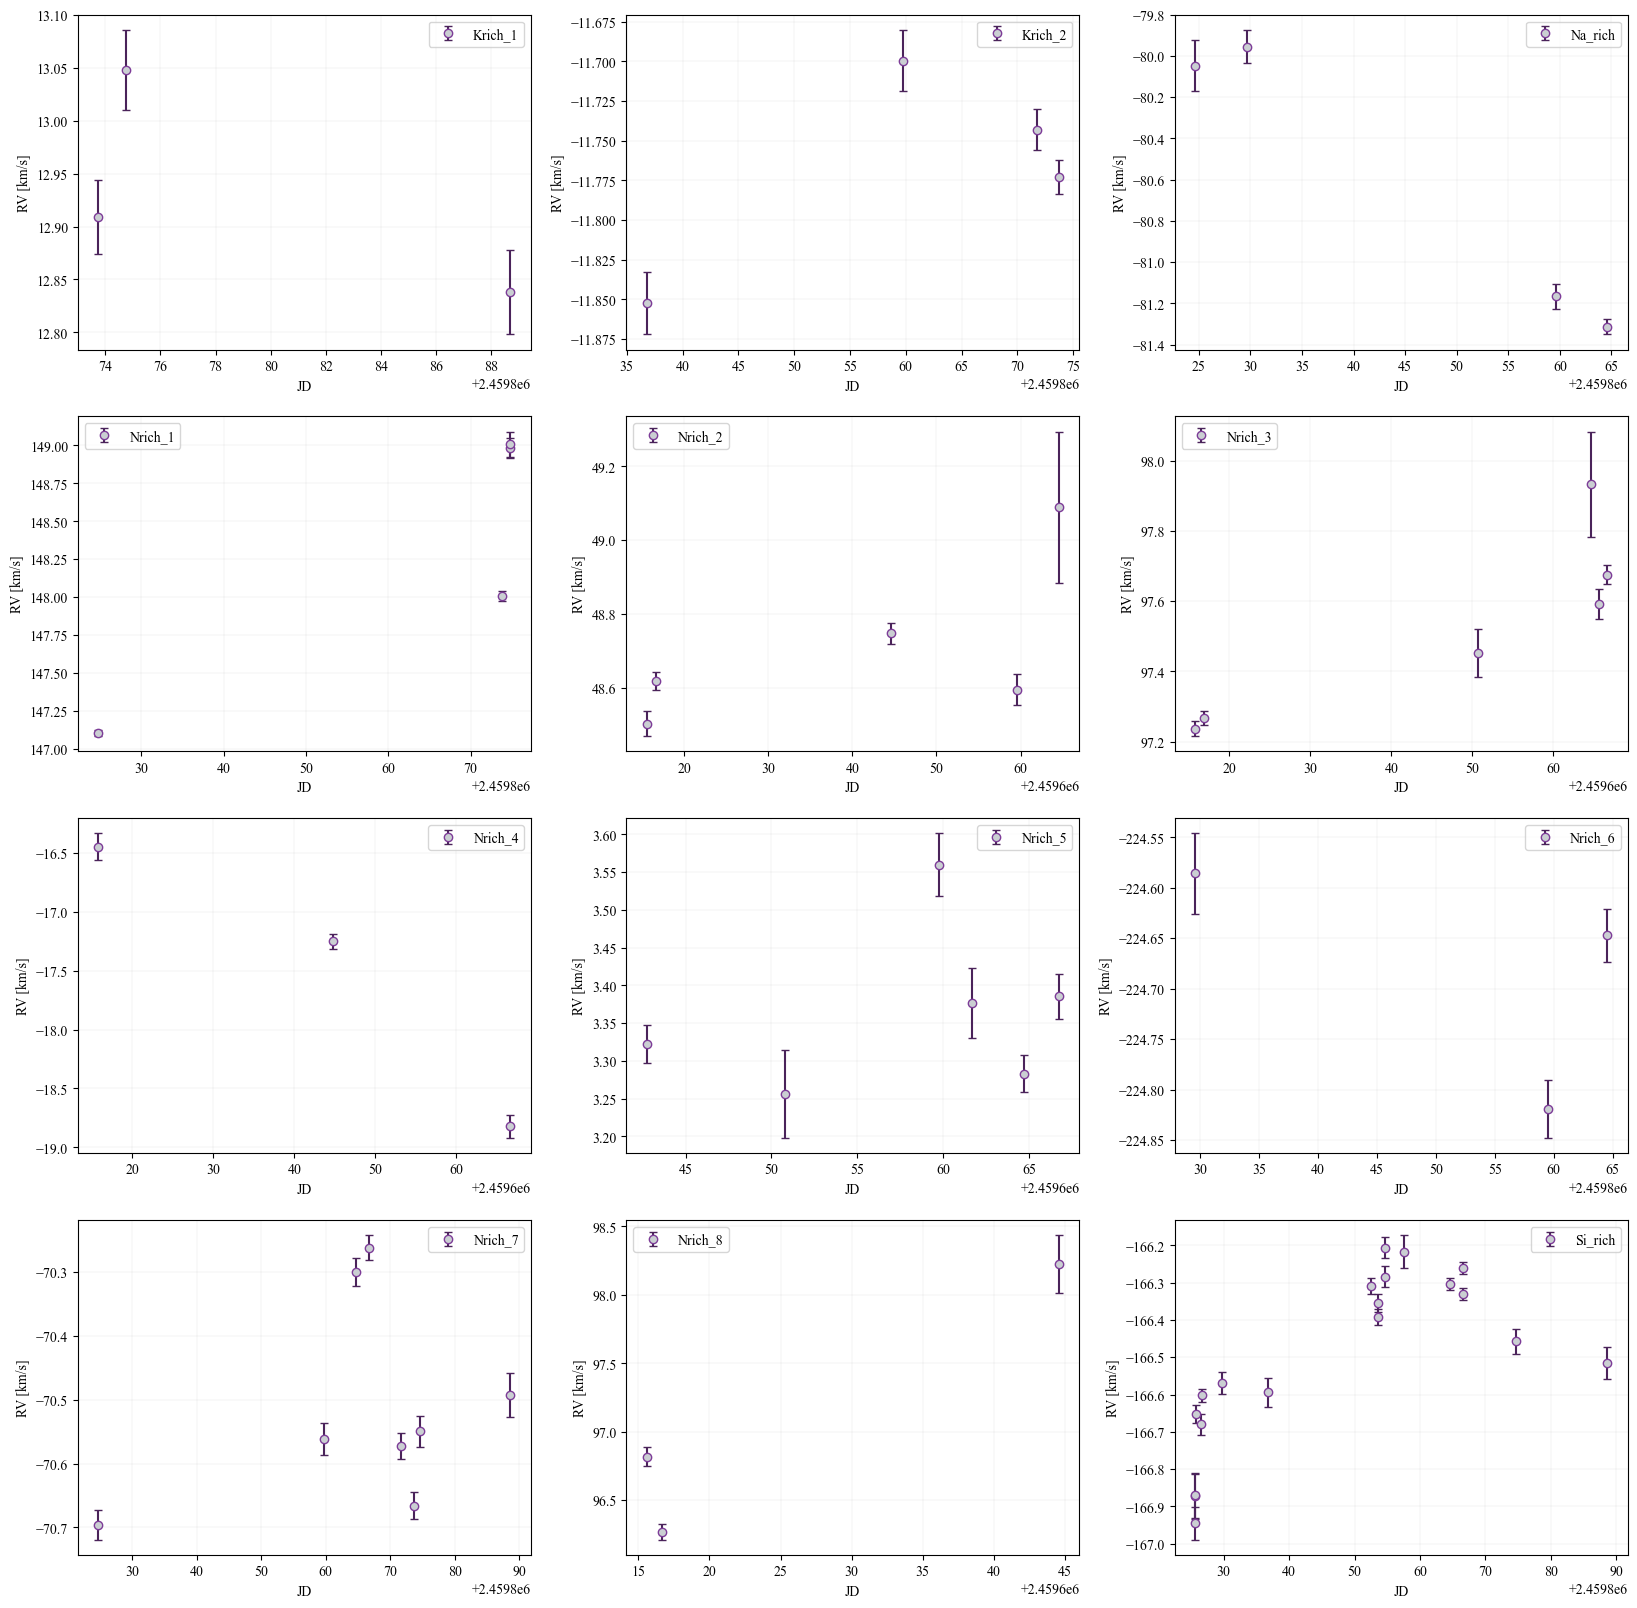

In [29]:
fig = plt.figure(figsize=(20,20))

gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0.21)
(ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12) = gs.subplots()


ax1.errorbar(Estrella["Krich_1"]["Date"], Estrella["Krich_1"]["RV"],  yerr = Estrella["Krich_1"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][0] )
# ax1.plot(Estrella["Krich_1"]["Date"], Estrella["Krich_1"]["RV"], "--")

ax2.errorbar(Estrella["Krich_2"]["Date"], Estrella["Krich_2"]["RV"],  yerr = Estrella["Krich_2"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][1] )
# ax2.plot(Estrella["Krich_2"]["Date"], Estrella["Krich_2"]["RV"], "--")

ax3.errorbar(Estrella["Na_rich"]["Date"], Estrella["Na_rich"]["RV"],  yerr = Estrella["Na_rich"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][2] )
# ax3.plot(Estrella["Na_rich"]["Date"], Estrella["Na_rich"]["RV"], "--")

ax4.errorbar(Estrella["Nrich_1"]["Date"], Estrella["Nrich_1"]["RV"],  yerr = Estrella["Nrich_1"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][3] )
# ax4.plot(Estrella["Nrich_1"]["Date"], Estrella["Nrich_1"]["RV"], "--")

ax5.errorbar(Estrella["Nrich_2"]["Date"], Estrella["Nrich_2"]["RV"],  yerr = Estrella["Nrich_2"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][4] )
# ax5.plot(Estrella["Nrich_2"]["Date"], Estrella["Nrich_2"]["RV"], "--")

ax6.errorbar(Estrella["Nrich_3"]["Date"], Estrella["Nrich_3"]["RV"],  yerr = Estrella["Nrich_3"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][5] )
# ax6.plot(Estrella["Nrich_3"]["Date"], Estrella["Nrich_3"]["RV"], "--")

ax7.errorbar(Estrella["Nrich_4"]["Date"], Estrella["Nrich_4"]["RV"],  yerr = Estrella["Nrich_4"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][6] )
# ax7.plot(Estrella["Nrich_4"]["Date"], Estrella["Nrich_4"]["RV"], "--")

ax8.errorbar(Estrella["Nrich_5"]["Date"], Estrella["Nrich_5"]["RV"],  yerr = Estrella["Nrich_5"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][7] )
# ax8.plot(Estrella["Nrich_5"]["Date"], Estrella["Nrich_5"]["RV"], "--")

ax9.errorbar(Estrella["Nrich_6"]["Date"], Estrella["Nrich_6"]["RV"],  yerr = Estrella["Nrich_6"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][8] )
# ax9.plot(Estrella["Nrich_6"]["Date"], Estrella["Nrich_6"]["RV"], "--")

ax10.errorbar(Estrella["Nrich_7"]["Date"], Estrella["Nrich_7"]["RV"],  yerr = Estrella["Nrich_7"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][9] )
# ax10.plot(Estrella["Nrich_7"]["Date"], Estrella["Nrich_7"]["RV"], "--")

ax11.errorbar(Estrella["Nrich_8"]["Date"], Estrella["Nrich_8"]["RV"],  yerr = Estrella["Nrich_8"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][10] )
# ax11.plot(Estrella["Nrich_8"]["Date"], Estrella["Nrich_8"]["RV"], "--")

ax12.errorbar(Estrella["Si_rich"]["Date"], Estrella["Si_rich"]["RV"],  yerr = Estrella["Si_rich"]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][11] )
# ax12.plot(Estrella["Si_rich"]["Date"], Estrella["Si_rich"]["RV"], "--")

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
for ax in axs:
    ax.set_xlabel("JD")
    ax.set_ylabel("RV [km/s]")
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend()


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


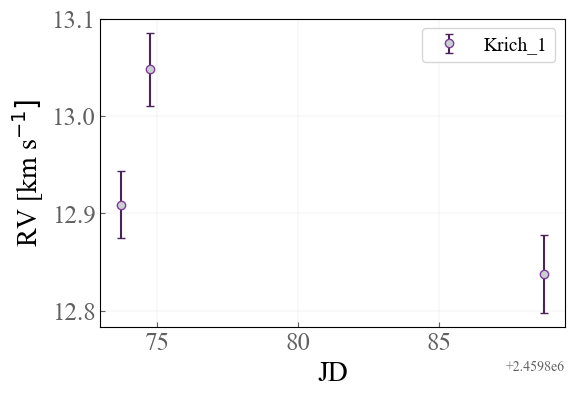

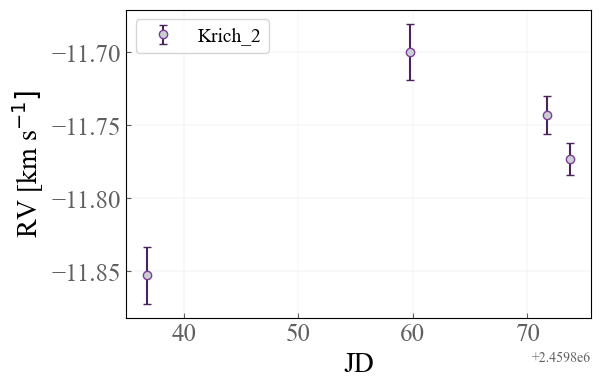

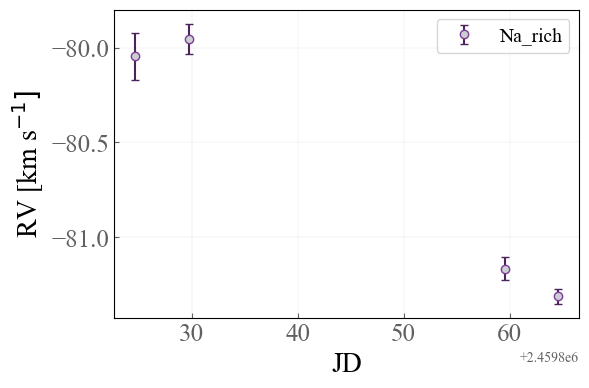

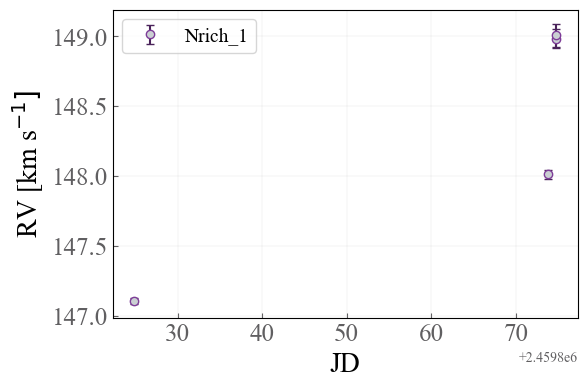

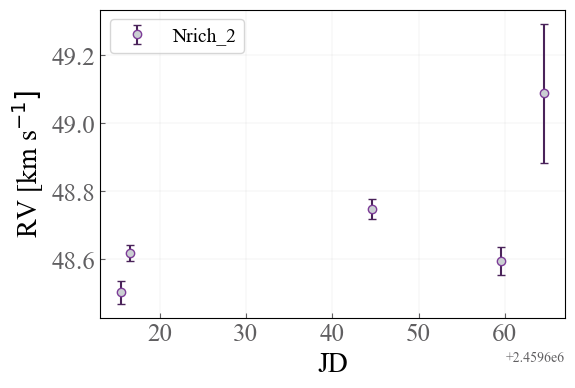

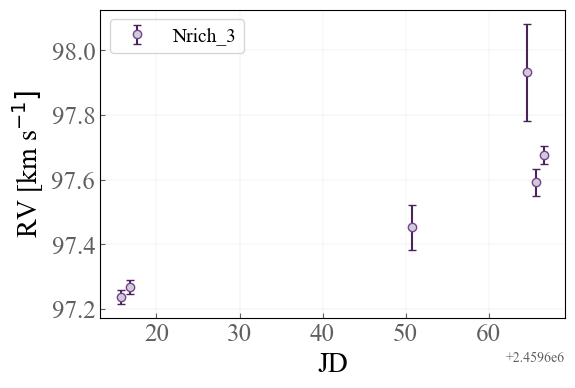

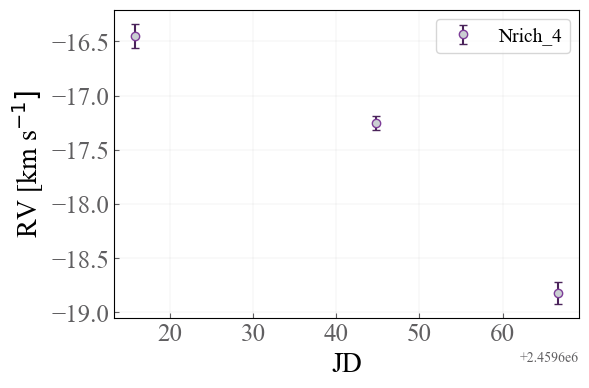

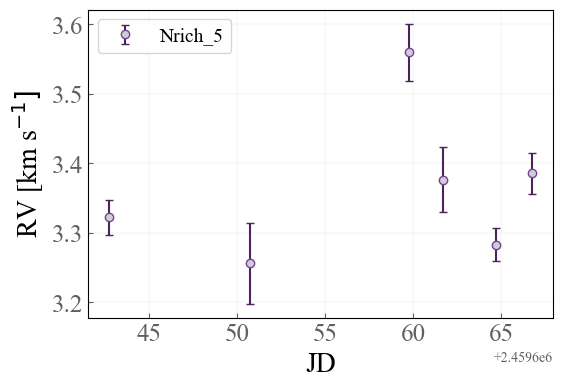

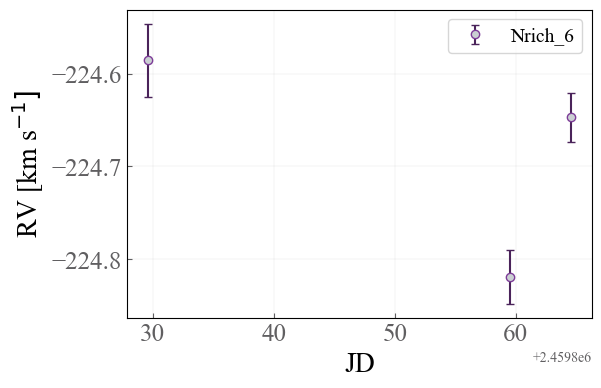

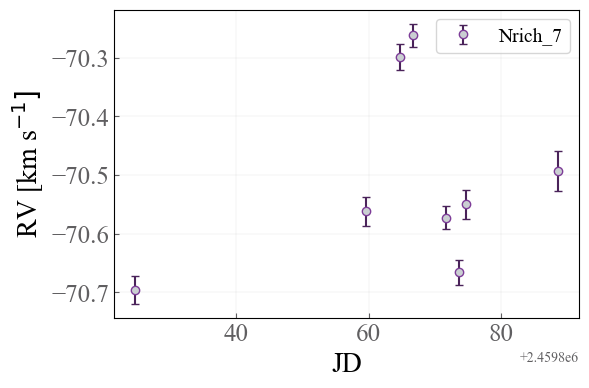

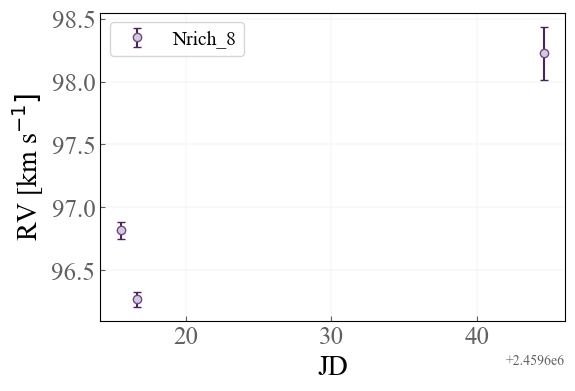

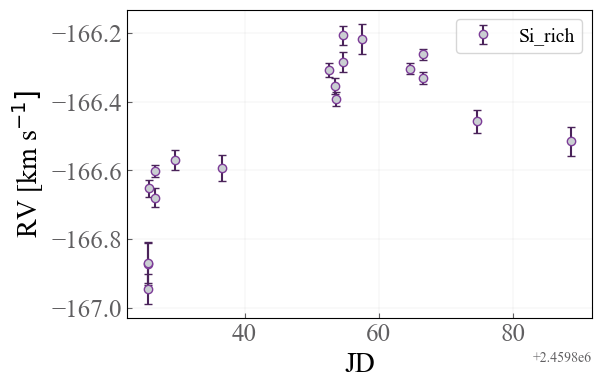

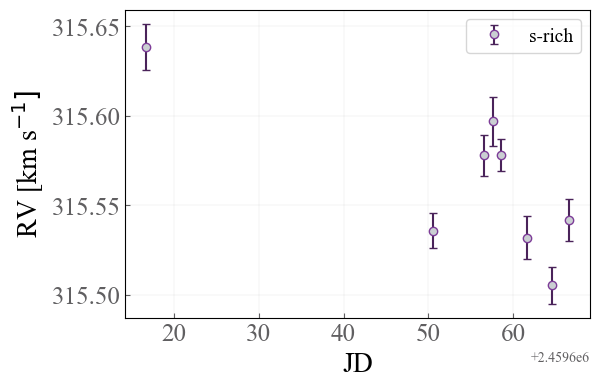

In [31]:
for i in np.arange(len(data["Estrella"])):
    plt.figure(figsize=(6,4))
    
    plt.errorbar(Estrella[data["Estrella"][i]]["Date"], Estrella[data["Estrella"][i]]["RV"],  yerr = Estrella[data["Estrella"][i]]["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = data["Estrella"][i] )
    plt.xlabel("JD",fontsize=20)
    plt.ylabel("RV [km s$^{-1}]$",fontsize=20)
    plt.grid(linestyle='-', linewidth=0.1)
    
    plt.legend(fontsize = 14)
    plt.tick_params(axis='both', labelsize=18,  direction="in", colors = "#605f61")  # Aumenta el tamaño de los números en ambos ejes
    
    plt.savefig(f"VR_{data["Estrella"][i]}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [33]:
Estrella[data["Estrella"][12]]

,Star,Date,RV,err_RV,S/N
0,TYC6524-876-1,2.459617e+06,315.6384,0.0130,63
1,TYC6524-876-1,2.459651e+06,315.5357,0.0098,102
2,TYC6524-876-1,2.459657e+06,315.5778,0.0114,102
3,TYC6524-876-1,2.459658e+06,315.5968,0.0136,80
4,TYC6524-876-1,2.459659e+06,315.5781,0.0091,114
5,TYC6524-876-1,2.459662e+06,315.5318,0.0120,80
6,TYC6524-876-1,2.459665e+06,315.5052,0.0102,106
7,TYC6524-876-1,2.459667e+06,315.5417,0.0118,97


In [35]:
standard_1 = pd.DataFrame()
standard_1["Star"] = ["HD10700","HD10700","HD10700","HD10700","HD10700","HD10700"]
standard_1["Date"] = [2459909.65073789, 2459909.65501101,2459909.65659494,2460140.86979848,2460140.87719779,2460140.88436262]
standard_1["RV"] = [-16.6332,-16.6272,-16.6358,-16.6113,-16.5844,-16.5975]
standard_1["err_RV"] = [0.0055,0.0054,0.0055,0.0051,0.0052,0.0052]

standard_2 = pd.DataFrame()
standard_2["Star"] = ["HD48381","HD48381"]
standard_2["Date"] = [ 2459911.82061493,2459932.73709687]
standard_2["RV"] = [40.5002, 40.5425]
standard_2["err_RV"] = [0.0058,0.0058]

standard_3 = pd.DataFrame()
standard_3["Star"] = ["HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673",
                      "HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673","HD72673",
                      "HD72673","HD72673","HD72673","HD72673","HD72673"]

standard_3["Date"] = [2459689.56129858,2459689.57085397,2459691.54070173,2459692.51501392,2459693.56949426,
                      2459700.54481159,2459703.53651666,2459703.54594784,2459705.57899704,2459705.58848409,
                      2459710.54248262,2459710.55199144,2459712.55740839,2459713.53461976,2460020.61160702,
                      2460020.61525735,2460020.61891691,2460020.62260781,2460020.62630010,2460027.56858592,
                      2460027.57286141,2460027.57651549,2460035.51305523,2460035.51741199,2460035.52194853]

standard_3["RV"] = [14.8275,14.8201,14.8206,14.8347,14.8304,14.8235,14.8149,14.8084,14.7835,14.7304,
                    14.7931,14.8058,14.8059,14.8040,14.8114,14.8075,14.8089,14.8147,14.7963,14.7705,
                    14.7488,14.7497,14.8127,14.8051,14.8082]

standard_3["err_RV"] = [0.0069,0.0074,0.0061,0.0060,0.0060,0.0064,0.0063,0.0063,0.0074,0.0090,
                        0.0063,0.0067,0.0067,0.0072,0.0080,0.0079,0.0080,0.0082,0.0080,0.0090,
                        0.0066,0.0064,0.0072,0.0073,0.0069]

standard_3["SNR"] = [163,138,237,252,247,204,211,213,133,92,
                     211,179,175,145,106,107,106,99,104,60,
                     106,114,135,131,148]


standard_4 = pd.DataFrame()
standard_4["Star"] = ["HD157347","HD157347","HD157347","HD157347","HD157347","HD157347","HD157347","HD157347","HD157347","HD157347",
                     "HD157347","HD157347","HD157347","HD157347"]

standard_4["Date"] = [2459682.80175885,2459682.81123673,2460056.77139151,2460056.77576483,2460056.78013197,
                      2460057.73995220,2460057.75056925,2460062.84027507,2460062.84394942,2460062.84762835,
                      2460063.83831262,2460063.84268851,2460098.68104677,2460098.72986503]

standard_4["RV"] = [-35.8622,-35.8708,-35.8824,-35.8826,-35.8796,-35.8712,-35.8755,-35.8939,-35.8903,-35.8891,
                    -35.8909,-35.8935,-35.9016,-35.9101]

standard_4["err_RV"] = [0.0053,0.0053,0.0060,0.0059,0.0058,0.0053,0.0056,0.0063,0.0063,0.0064,
                        0.0061,0.0061,0.0058,0.0063]

standard_4["SNR"] = [196,201,124,133,138,194,162,112,112,109,
                     119,121,135,107]


In [37]:
len(standard_1+standard_2+standard_3+standard_4)

25

In [39]:
#standard_3 = standard_3[standard_3["RV"] > 14.784]
np.mean(pd.concat([standard_3["SNR"],standard_4["SNR"]]))

148.17948717948718

In [41]:
max(standard_3["SNR"]),max(standard_4["SNR"])

(252, 201)

In [43]:
len(standard_4)+len(standard_3)+len(standard_2)+len(standard_1)

47

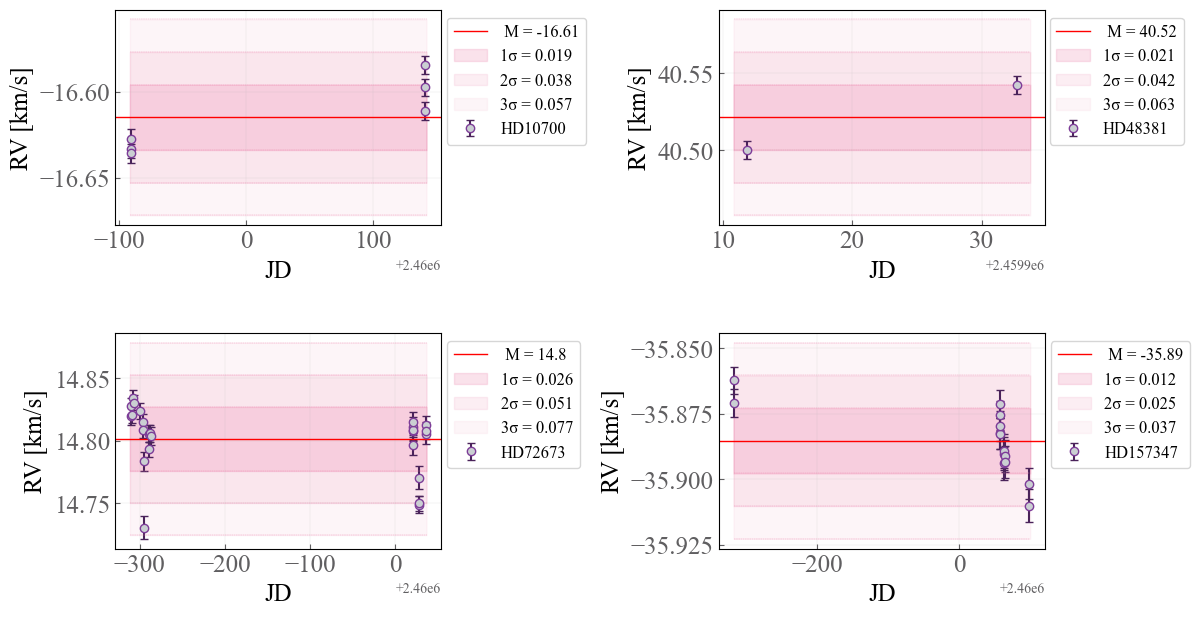

In [73]:
fig = plt.figure(figsize=(12,7))

gs = fig.add_gridspec(2,2, hspace=0.5, wspace=0.85)
(ax1,ax2),(ax3,ax4) = gs.subplots()


ax1.errorbar(standard_1["Date"], standard_1["RV"],  yerr = standard_1["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = standard_1["Star"][0] )
ax1.axhline(np.mean(standard_1["RV"]) , color = "red", linewidth = 1, linestyle = "-", label = f' M = {round(np.mean(standard_1["RV"]),2)}')
ax1.fill_between(np.linspace(np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1,1000),np.mean(standard_1["RV"])+ np.array(-1*np.std(standard_1["RV"])),np.mean(standard_1["RV"])+np.array(1*np.std(standard_1["RV"])),  color='#EE88AF', alpha=0.24, label = f'1σ = {round(1*np.std(standard_1["RV"]),3)}')
ax1.fill_between(np.linspace(np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1,1000),np.mean(standard_1["RV"])+ np.array(-2*np.std(standard_1["RV"])),np.mean(standard_1["RV"])+np.array(2*np.std(standard_1["RV"])),  color='#EE88AF', alpha=0.14, label = f'2σ = {round(2*np.std(standard_1["RV"]),3)}')
ax1.fill_between(np.linspace(np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1,1000),np.mean(standard_1["RV"])+ np.array(-3*np.std(standard_1["RV"])),np.mean(standard_1["RV"])+np.array(3*np.std(standard_1["RV"])),  color='#EE88AF', alpha=0.08, label = f'3σ = {round(3*np.std(standard_1["RV"]),3)}')

ax1.hlines(np.mean(standard_1["RV"])+np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax1.hlines(np.mean(standard_1["RV"])-np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax1.hlines(np.mean(standard_1["RV"])+2*np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax1.hlines(np.mean(standard_1["RV"])-2*np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax1.hlines(np.mean(standard_1["RV"])+3*np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax1.hlines(np.mean(standard_1["RV"])-3*np.std(standard_1["RV"]),np.min(standard_1["Date"])-1,np.max(standard_1["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")

ax2.errorbar(standard_2["Date"], standard_2["RV"],  yerr = standard_2["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = standard_2["Star"][0] )
ax2.axhline(np.mean(standard_2["RV"]) , color = "red", linewidth = 1, linestyle = "-", label = f' M = {round(np.mean(standard_2["RV"]),2)}')
ax2.fill_between(np.linspace(np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1,1000),np.mean(standard_2["RV"])+ np.array(-1*np.std(standard_2["RV"])),np.mean(standard_2["RV"])+np.array(1*np.std(standard_2["RV"])),  color='#EE88AF', alpha=0.24, label = f'1σ = {round(1*np.std(standard_2["RV"]),3)}')
ax2.fill_between(np.linspace(np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1,1000),np.mean(standard_2["RV"])+ np.array(-2*np.std(standard_2["RV"])),np.mean(standard_2["RV"])+np.array(2*np.std(standard_2["RV"])),  color='#EE88AF', alpha=0.14, label = f'2σ = {round(2*np.std(standard_2["RV"]),3)}')
ax2.fill_between(np.linspace(np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1,1000),np.mean(standard_2["RV"])+ np.array(-3*np.std(standard_2["RV"])),np.mean(standard_2["RV"])+np.array(3*np.std(standard_2["RV"])),  color='#EE88AF', alpha=0.08, label = f'3σ = {round(3*np.std(standard_2["RV"]),3)}')

ax2.hlines(np.mean(standard_2["RV"])+np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax2.hlines(np.mean(standard_2["RV"])-np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax2.hlines(np.mean(standard_2["RV"])+2*np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax2.hlines(np.mean(standard_2["RV"])-2*np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax2.hlines(np.mean(standard_2["RV"])+3*np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax2.hlines(np.mean(standard_2["RV"])-3*np.std(standard_2["RV"]),np.min(standard_2["Date"])-1,np.max(standard_2["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")

ax3.errorbar(standard_3["Date"], standard_3["RV"],  yerr = standard_3["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = standard_3["Star"][0] )
ax3.axhline(np.mean(standard_3["RV"]) , color = "red", linewidth = 1, linestyle = "-", label = f' M = {round(np.mean(standard_3["RV"]),2)}')
ax3.fill_between(np.linspace(np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1,1000),np.mean(standard_3["RV"])+ np.array(-1*np.std(standard_3["RV"])),np.mean(standard_3["RV"])+np.array(1*np.std(standard_3["RV"])),  color='#EE88AF', alpha=0.24, label = f'1σ = {round(1*np.std(standard_3["RV"]),3)}')
ax3.fill_between(np.linspace(np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1,1000),np.mean(standard_3["RV"])+ np.array(-2*np.std(standard_3["RV"])),np.mean(standard_3["RV"])+np.array(2*np.std(standard_3["RV"])),  color='#EE88AF', alpha=0.14, label = f'2σ = {round(2*np.std(standard_3["RV"]),3)}')
ax3.fill_between(np.linspace(np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1,1000),np.mean(standard_3["RV"])+ np.array(-3*np.std(standard_3["RV"])),np.mean(standard_3["RV"])+np.array(3*np.std(standard_3["RV"])),  color='#EE88AF', alpha=0.08, label = f'3σ = {round(3*np.std(standard_3["RV"]),3)}')

ax3.hlines(np.mean(standard_3["RV"])+np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax3.hlines(np.mean(standard_3["RV"])-np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax3.hlines(np.mean(standard_3["RV"])+2*np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax3.hlines(np.mean(standard_3["RV"])-2*np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax3.hlines(np.mean(standard_3["RV"])+3*np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax3.hlines(np.mean(standard_3["RV"])-3*np.std(standard_3["RV"]),np.min(standard_3["Date"])-1,np.max(standard_3["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")

ax4.errorbar(standard_4["Date"], standard_4["RV"],  yerr = standard_4["err_RV"], linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1, label = standard_4["Star"][0] )
ax4.axhline(np.mean(standard_4["RV"]) , color = "red", linewidth = 1, linestyle = "-", label = f' M = {round(np.mean(standard_4["RV"]),2)}')
ax4.fill_between(np.linspace(np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1,1000),np.mean(standard_4["RV"])+ np.array(-1*np.std(standard_4["RV"])),np.mean(standard_4["RV"])+np.array(1*np.std(standard_4["RV"])),  color='#EE88AF', alpha=0.24, label = f'1σ = {round(1*np.std(standard_4["RV"]),3)}')
ax4.fill_between(np.linspace(np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1,1000),np.mean(standard_4["RV"])+ np.array(-2*np.std(standard_4["RV"])),np.mean(standard_4["RV"])+np.array(2*np.std(standard_4["RV"])),  color='#EE88AF', alpha=0.14, label = f'2σ = {round(2*np.std(standard_4["RV"]),3)}')
ax4.fill_between(np.linspace(np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1,1000),np.mean(standard_4["RV"])+ np.array(-3*np.std(standard_4["RV"])),np.mean(standard_4["RV"])+np.array(3*np.std(standard_4["RV"])),  color='#EE88AF', alpha=0.08, label = f'3σ = {round(3*np.std(standard_4["RV"]),3)}')

ax4.hlines(np.mean(standard_4["RV"])+np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax4.hlines(np.mean(standard_4["RV"])-np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--",lw = 0.3,color = "#EE88AF")
ax4.hlines(np.mean(standard_4["RV"])+2*np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax4.hlines(np.mean(standard_4["RV"])-2*np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax4.hlines(np.mean(standard_4["RV"])+3*np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")
ax4.hlines(np.mean(standard_4["RV"])-3*np.std(standard_4["RV"]),np.min(standard_4["Date"])-1,np.max(standard_4["Date"])+1, ls = "--", lw = 0.3, color = "#EE88AF")

ax1.legend(bbox_to_anchor=(1.02, 0.5, 0.45, 0.5), fontsize = 12)
ax2.legend(bbox_to_anchor=(1, 0.5, 0.45, 0.5), fontsize = 12)
ax3.legend(bbox_to_anchor=(1, 0.5, 0.45, 0.5), fontsize = 12)
ax4.legend(bbox_to_anchor=(1.02, 0.5, 0.45, 0.5), fontsize = 12)

axs = [ax1,ax2,ax3,ax4]
for ax in axs:
    ax.set_xlabel("JD", fontsize = 18)
    ax.set_ylabel("RV [km/s]", fontsize = 18)
    ax.tick_params(axis='both', labelsize=18,  direction="in", colors = "#605f61")  # Aumenta el tamaño de los números en ambos ejes
    ax.grid(linestyle='-', linewidth=0.1)

plt.savefig("Estandar en VR.png", dpi=300, bbox_inches="tight")


In [75]:
means = []
means_err = []
ranges = []
stds = []
for i in data["Estrella"]:
    means.append(np.mean(Estrella[i]["RV"]))
    means_err.append(np.mean(Estrella[i]["err_RV"]))
    ranges.append(np.max(Estrella[i]["RV"])-np.min(Estrella[i]["RV"]))
    stds.append(np.std(Estrella[i]["RV"]))

In [77]:
means.append(np.mean(standard_1["RV"])),means.append(np.mean(standard_2["RV"])),means.append(np.mean(standard_3["RV"])),means.append(np.mean(standard_4["RV"]))
means_err.append(np.mean(standard_1["err_RV"])),means_err.append(np.mean(standard_2["err_RV"])),means_err.append(np.mean(standard_3["err_RV"])),means_err.append(np.mean(standard_4["err_RV"]))
ranges.append(np.max(standard_1["RV"])-np.min(standard_1["RV"])),ranges.append(np.max(standard_2["RV"])-np.min(standard_2["RV"])),ranges.append(np.max(standard_3["RV"])-np.min(standard_3["RV"])),ranges.append(np.max(standard_4["RV"])-np.min(standard_4["RV"]))
stds.append(np.std(standard_1["RV"])),stds.append(np.std(standard_2["RV"])),stds.append(np.std(standard_3["RV"])),stds.append(np.std(standard_4["RV"]))
means

[12.931666666666667,
 -11.767025,
 -80.619475,
 148.27635,
 48.70996,
 97.52595000000001,
 -17.50743333333333,
 3.3640000000000003,
 -224.68403333333333,
 -70.5124875,
 97.10336666666667,
 -166.4959105263158,
 315.5631875,
 -16.6149,
 40.52135,
 14.801464,
 -35.885264285714285]

In [79]:
estrellas = data["Estrella"].to_numpy().tolist()
estrellas.append(standard_1["Star"][0]), estrellas.append(standard_2["Star"][0]), estrellas.append(standard_3["Star"][0]),estrellas.append(standard_4["Star"][0])
estrellas

['Krich_1',
 'Krich_2',
 'Na_rich',
 'Nrich_1',
 'Nrich_2',
 'Nrich_3',
 'Nrich_4',
 'Nrich_5',
 'Nrich_6',
 'Nrich_7',
 'Nrich_8',
 'Si_rich',
 's-rich',
 'HD10700',
 'HD48381',
 'HD72673',
 'HD157347']

In [81]:
stadistics = pd.DataFrame()
stadistics["Star"] = estrellas
stadistics["Means_RV"] = means
stadistics["Means_err"] = means_err
stadistics["Ranges_RV"] = ranges
stadistics["Stds_RV"] = stds
stadistics

,Star,Means_RV,Means_err,Ranges_RV,Stds_RV
0,Krich_1,12.931667,0.037500,0.2097,0.087084
1,Krich_2,-11.767025,0.015625,0.1530,0.055843
2,Na_rich,-80.619475,0.075550,1.3584,0.622319
3,Nrich_1,148.276350,0.050975,1.8991,0.785391
4,Nrich_2,48.709960,0.066640,0.5862,0.204804
5,Nrich_3,97.525950,0.055200,0.6949,0.240523
6,Nrich_4,-17.507433,0.093067,2.3701,0.984355
7,Nrich_5,3.364000,0.037367,0.3036,0.099040
8,Nrich_6,-224.684033,0.031567,0.2333,0.098741
9,Nrich_7,-70.512488,0.023837,0.4341,0.147154


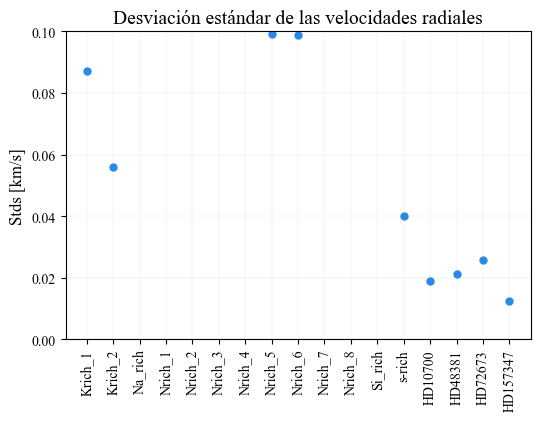

In [83]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(stadistics["Stds_RV"])) , stadistics["Stds_RV"], "o", color ='#298AE5', markersize = 5)

plt.ylabel('Stds [km/s]' ,fontsize = 12)
plt.title("Desviación estándar de las velocidades radiales",fontsize = 14)
plt.xticks(np.arange(len(stadistics["Stds_RV"])), stadistics["Star"] , rotation=90)
plt.ylim(0,0.1)
plt.grid(linestyle='-', linewidth=0.1)
plt.show()

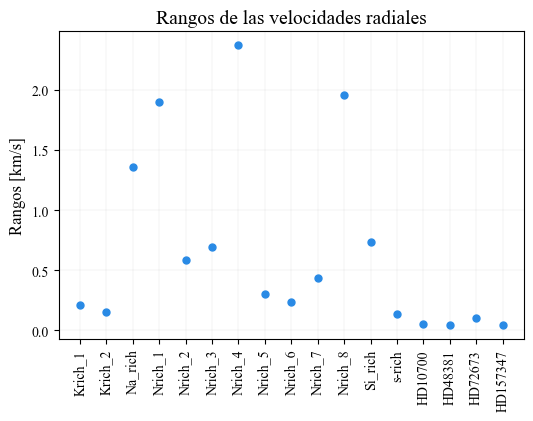

In [85]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(stadistics["Ranges_RV"])) , stadistics["Ranges_RV"], "o", color ='#298AE5', markersize = 5)

plt.ylabel('Rangos [km/s]' ,fontsize = 12)
plt.title("Rangos de las velocidades radiales",fontsize = 14)
plt.xticks(np.arange(len(stadistics["Ranges_RV"])), stadistics["Star"] , rotation=90)
plt.grid(linestyle='-', linewidth=0.1)
plt.show()

In [87]:
data["Estrella"]

0     Krich_1
1     Krich_2
2     Na_rich
3     Nrich_1
4     Nrich_2
5     Nrich_3
6     Nrich_4
7     Nrich_5
8     Nrich_6
9     Nrich_7
10    Nrich_8
11    Si_rich
12     s-rich
Name: Estrella, dtype: object

In [89]:
Estrella["s-rich"]

,Star,Date,RV,err_RV,S/N
0,TYC6524-876-1,2.459617e+06,315.6384,0.0130,63
1,TYC6524-876-1,2.459651e+06,315.5357,0.0098,102
2,TYC6524-876-1,2.459657e+06,315.5778,0.0114,102
3,TYC6524-876-1,2.459658e+06,315.5968,0.0136,80
4,TYC6524-876-1,2.459659e+06,315.5781,0.0091,114
5,TYC6524-876-1,2.459662e+06,315.5318,0.0120,80
6,TYC6524-876-1,2.459665e+06,315.5052,0.0102,106
7,TYC6524-876-1,2.459667e+06,315.5417,0.0118,97


In [91]:
all_df = pd.DataFrame()
columns = ["Date", "RV","err_RV"]
dfs_name = ["df1","df2","df3","df4","df5","df6","df7","df8","df9","df10","df11","df12","df13"]

for i,k in zip(data["Estrella"], dfs_name):
    globals()[k] = pd.DataFrame()
    for j in columns:
        globals()[k][j] = Estrella[i][j]

In [93]:
dfs = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]

In [95]:
for i,j in zip(dfs,["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"]):
    i["Star"] = j
    i["RV-mean(RV)"] = i["RV"]-np.mean(i["RV"])
    i["err_RV-mean(err_RV)"] = i["err_RV"]-np.mean(i["err_RV"])

In [97]:
all_df = pd.concat([globals()["df1"],globals()["df2"],globals()["df3"],globals()["df4"],globals()["df5"],globals()["df6"],globals()["df7"],globals()["df8"],globals()["df9"],globals()["df10"],globals()["df11"],globals()["df12"],globals()["df13"]])
all_df.head(20)

,Date,RV,err_RV,Star,RV-mean(RV),err_RV-mean(err_RV)
0,2.459874e+06,12.9091,0.0347,K-1,-0.022567,-0.002800
1,2.459875e+06,13.0478,0.0379,K-1,0.116133,0.000400
2,2.459889e+06,12.8381,0.0399,K-1,-0.093567,0.002400
0,2.459837e+06,-11.8525,0.0195,K-2,-0.085475,0.003875
1,2.459860e+06,-11.6995,0.0193,K-2,0.067525,0.003675
2,2.459872e+06,-11.7431,0.0130,K-2,0.023925,-0.002625
3,2.459874e+06,-11.7730,0.0107,K-2,-0.005975,-0.004925
0,2.459825e+06,-80.0464,0.1241,Na,0.573075,0.048550
1,2.459830e+06,-79.9540,0.0804,Na,0.665475,0.004850
2,2.459860e+06,-81.1651,0.0602,Na,-0.545625,-0.015350


In [99]:
standard_1["RV-mean(RV)"] = standard_1["RV"]-np.mean(standard_1["RV"])
standard_1["err_RV-mean(err_RV)"] = standard_1["err_RV"]-np.mean(standard_1["err_RV"])

standard_2["RV-mean(RV)"] = standard_2["RV"]-np.mean(standard_2["RV"])
standard_2["err_RV-mean(err_RV)"] = standard_2["err_RV"]-np.mean(standard_2["err_RV"])

standard_3["RV-mean(RV)"] = standard_3["RV"]-np.mean(standard_3["RV"])
standard_3["err_RV-mean(err_RV)"] = standard_3["err_RV"]-np.mean(standard_3["err_RV"])

standard_4["RV-mean(RV)"] = standard_4["RV"]-np.mean(standard_4["RV"])
standard_4["err_RV-mean(err_RV)"] = standard_4["err_RV"]-np.mean(standard_4["err_RV"])

In [101]:
RV_mean_standard = standard_1["RV-mean(RV)"].to_numpy().tolist() + standard_2["RV-mean(RV)"].to_numpy().tolist() + standard_3["RV-mean(RV)"].to_numpy().tolist() + standard_4["RV-mean(RV)"].to_numpy().tolist()
RV_mean_standard_err = standard_1["err_RV-mean(err_RV)"].to_numpy().tolist() + standard_2["err_RV-mean(err_RV)"].to_numpy().tolist() + standard_3["err_RV-mean(err_RV)"].to_numpy().tolist() + standard_4["err_RV-mean(err_RV)"].to_numpy().tolist()

print("Número de datos: ",len(RV_mean_standard))
σ = np.std(RV_mean_standard)
print("Desviación estándar",σ)
print("Err Desciación estándar",np.std(RV_mean_standard_err))

Número de datos:  47
Desviación estándar 0.02152055659668213
Err Desciación estándar 0.00066601416903366


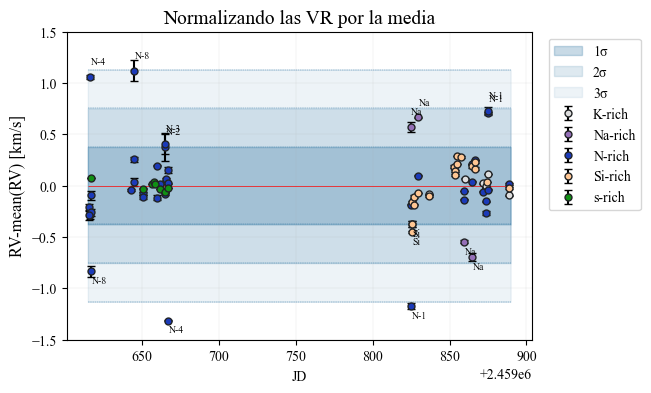

In [103]:
plt.figure(figsize=(6,4))
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-1*np.std(all_df["RV-mean(RV)"])),np.array(1*np.std(all_df["RV-mean(RV)"])),  color='#1A6799', alpha=0.24, label = '1σ')
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-2*np.std(all_df["RV-mean(RV)"])),np.array(2*np.std(all_df["RV-mean(RV)"])),  color='#1A6799', alpha=0.14, label = '2σ')
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-3*np.std(all_df["RV-mean(RV)"])),np.array(3*np.std(all_df["RV-mean(RV)"])),  color='#1A6799', alpha=0.08, label = '3σ')

#plt.scatter(x = all_df[all_df['Star'].str.startswith('K-')]["Date"],y = all_df[all_df['Star'].str.startswith('K-')]["RV-mean(RV)"],s=20, color="#DEDEDE", marker="o", ec='#212325', label = "K-rich")
# plt.scatter(x = all_df[all_df['Star'].str.startswith('Na')]["Date"],y = all_df[all_df['Star'].str.startswith('Na')]["RV-mean(RV)"],s=20, color="#946FB7", marker="o", ec='#212325', label = "Na-rich")
# plt.scatter(x = all_df[all_df['Star'].str.startswith('N-')]["Date"],y = all_df[all_df['Star'].str.startswith('N-')]["RV-mean(RV)"],s=20, color="#1B3AB9", marker="o", ec='#212325', label = "N-rich")
# plt.scatter(x = all_df[all_df['Star'].str.startswith('Si')]["Date"],y = all_df[all_df['Star'].str.startswith('Si')]["RV-mean(RV)"],s=20, color="#FFC693", marker="o", ec='#212325', label = "Si-rich")
# plt.scatter(x = all_df[all_df['Star'].str.startswith('s')]["Date"],y = all_df[all_df['Star'].str.startswith('s')]["RV-mean(RV)"],s=20, color="#109014", marker="o", ec='#212325', label = "s-rich")

plt.errorbar(x = all_df[all_df['Star'].str.startswith('K-')]["Date"],y = all_df[all_df['Star'].str.startswith('K-')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('K-')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#DEDEDE',mec='#212325', ms=5, mew=1, label = "K-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('Na')]["Date"],y = all_df[all_df['Star'].str.startswith('Na')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('Na')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#946FB7',mec='#212325', ms=5, mew=1, label = "Na-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-')]["Date"],y = all_df[all_df['Star'].str.startswith('N-')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#1B3AB9',mec='#212325', ms=5, mew=1, label = "N-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('Si')]["Date"],y = all_df[all_df['Star'].str.startswith('Si')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('Si')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#FFC693',mec='#212325', ms=5, mew=1, label = "Si-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('s')]["Date"],y = all_df[all_df['Star'].str.startswith('s')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('s')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#109014',mec='#212325', ms=5, mew=1, label = "s-rich" )

# plt.plot(all_df["Date"] , all_df["RV-mean(RV)"], "o", color ='#298AE5', markersize = 5)
for i,j,k,l in zip(all_df["RV-mean(RV)"],all_df["Star"],all_df["Date"],all_df["RV-mean(RV)"]):
    if (i >= np.std(all_df["RV-mean(RV)"])):
        plt.annotate(j, xy = (k,l+0.12), fontsize=7)

for i,j,k,l in zip(all_df["RV-mean(RV)"],all_df["Star"],all_df["Date"],all_df["RV-mean(RV)"]):
    if (i <= -np.std(all_df["RV-mean(RV)"])):
        plt.annotate(j, xy = (k,l-0.12), fontsize=7)
        
plt.hlines(0,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,ls = "-",lw = 0.5,color = "r")
plt.hlines(0+np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0-np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0+2*np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-2*np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0+3*np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-3*np.std(all_df["RV-mean(RV)"]),np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")


plt.ylim(-1.5,1.5)
plt.xlabel("JD")
plt.ylabel('RV-mean(RV) [km/s]' ,fontsize = 12)
plt.title("Normalizando las VR por la media",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.1)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.45, 0.5))
plt.show()

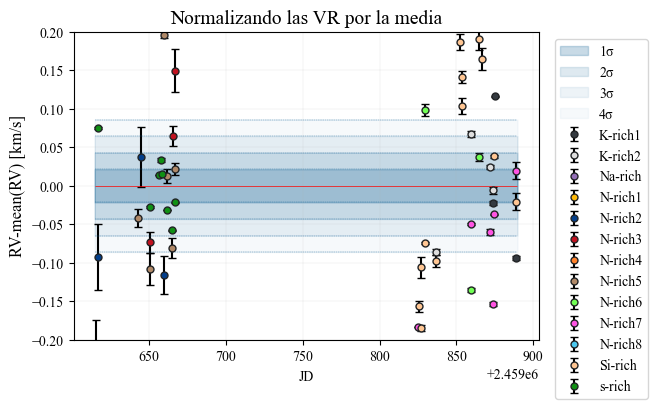

In [105]:
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]


plt.figure(figsize=(6,4))
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '1σ')
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '2σ')
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '3σ')
plt.fill_between(np.linspace(np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '4σ')

plt.errorbar(x = all_df[all_df['Star'].str.startswith('K-1')]["Date"],y = all_df[all_df['Star'].str.startswith('K-1')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('K-1')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#343A40',mec='#212325', ms=5, mew=1, label = "K-rich1" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('K-2')]["Date"],y = all_df[all_df['Star'].str.startswith('K-2')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('K-2')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#DEDEDE',mec='#212325', ms=5, mew=1, label = "K-rich2" )

plt.errorbar(x = all_df[all_df['Star'].str.startswith('Na')]["Date"],y = all_df[all_df['Star'].str.startswith('Na')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('Na')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#946FB7',mec='#212325', ms=5, mew=1, label = "Na-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-1')]["Date"],y = all_df[all_df['Star'].str.startswith('N-1')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-1')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#FFBA08',mec='#212325', ms=5, mew=1, label = "N-rich1" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-2')]["Date"],y = all_df[all_df['Star'].str.startswith('N-2')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-2')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#023E8A',mec='#212325', ms=5, mew=1, label = "N-rich2" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-3')]["Date"],y = all_df[all_df['Star'].str.startswith('N-3')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-3')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#C1121F',mec='#212325', ms=5, mew=1, label = "N-rich3" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-4')]["Date"],y = all_df[all_df['Star'].str.startswith('N-4')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-4')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#FF822B',mec='#212325', ms=5, mew=1, label = "N-rich4" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-5')]["Date"],y = all_df[all_df['Star'].str.startswith('N-5')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-5')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#B08968',mec='#212325', ms=5, mew=1, label = "N-rich5" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-6')]["Date"],y = all_df[all_df['Star'].str.startswith('N-6')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-6')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#71FF54',mec='#212325', ms=5, mew=1, label = "N-rich6" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-7')]["Date"],y = all_df[all_df['Star'].str.startswith('N-7')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-7')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#FF54E3',mec='#212325', ms=5, mew=1, label = "N-rich7" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('N-8')]["Date"],y = all_df[all_df['Star'].str.startswith('N-8')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('N-8')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#4CC9F0',mec='#212325', ms=5, mew=1, label = "N-rich8" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('Si')]["Date"],y = all_df[all_df['Star'].str.startswith('Si')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('Si')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#FFC693',mec='#212325', ms=5, mew=1, label = "Si-rich" )
plt.errorbar(x = all_df[all_df['Star'].str.startswith('s')]["Date"],y = all_df[all_df['Star'].str.startswith('s')]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith('s')]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#109014',mec='#212325', ms=5, mew=1, label = "s-rich" )

# plt.plot(all_df["Date"] , all_df["RV-mean(RV)"], "o", color ='#298AE5', markersize = 5)
for i,j,k,l in zip(all_df["RV-mean(RV)"],all_df["Star"],all_df["Date"],all_df["RV-mean(RV)"]):
    if (i >= np.std(all_df["RV-mean(RV)"])):
        plt.annotate(j, xy = (k,l+0.12), fontsize=7)

for i,j,k,l in zip(all_df["RV-mean(RV)"],all_df["Star"],all_df["Date"],all_df["RV-mean(RV)"]):
    if (i <= -np.std(all_df["RV-mean(RV)"])):
        plt.annotate(j, xy = (k,l-0.12), fontsize=7)
        
plt.hlines(0,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1,ls = "-",lw = 0.5,color = "r")
plt.hlines(0+σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0-σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0+2*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-2*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0+3*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-3*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0+4*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-4*σ,np.min(all_df["Date"])-1,np.max(all_df["Date"])+1, ls = "--", lw = 0.3, color = "#1A6799")


plt.ylim(-0.2,0.2)
plt.xlabel("JD")
plt.ylabel('RV-mean(RV) [km/s]' ,fontsize = 12)
plt.title("Normalizando las VR por la media",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.1)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.45, 0.5))
plt.show()

In [107]:
import warnings
warnings.filterwarnings("ignore")


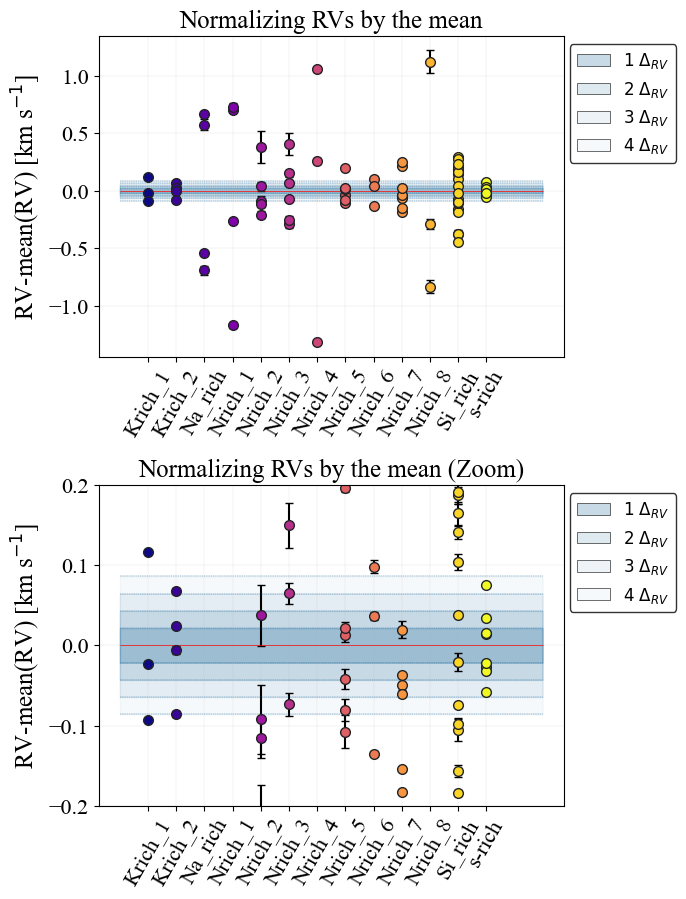

In [109]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]

fig = plt.figure(figsize=(6,10))

gs = fig.add_gridspec(2,1, hspace=0.4, wspace=0.)
(ax1),(ax2) = gs.subplots()


ax1.fill_between(np.linspace(-1,14,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '$1~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '$2~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '$3~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '$4~\Delta_{RV}$')

for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    ax1.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=7, mew=1)
    

ax1.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
ax1.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax1.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax1.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0+4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")

ax1.tick_params(axis='y', labelsize=16)  # Cambia el tamaño de los números en el eje Y

#plt.ylim(-0.2,0.2)
ax1.set_ylabel('RV-mean(RV) [km s$^{-1}$]' ,fontsize = 18)
ax1.set_title("Normalizing RVs by the mean",fontsize = 18)
ax1.set_xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=60,fontsize = 16)
ax1.grid(linestyle='-', linewidth=0.1)
legend1 = ax1.legend(bbox_to_anchor=(0.78, 0.5, 0.48, 0.5), fontsize=12, frameon=True, edgecolor='black')

# Modificar los bordes de cada recuadro en la leyenda
for patch in legend1.get_patches():
    patch.set_edgecolor("black")  # Cambia el borde a negro
    patch.set_linewidth(0.4)  # Ajusta el grosor del borde
    
ax2.fill_between(np.linspace(-1,14,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '$1~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '$2~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '$3~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '$4~\Delta_{RV}$')

for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    ax2.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=7, mew=1)
    

ax2.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
ax2.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax2.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax2.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0+4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")

ax2.tick_params(axis='y', labelsize=16)  # Cambia el tamaño de los números en el eje Y

ax2.set_ylim(-0.2,0.2)
ax2.set_ylabel('RV-mean(RV) [km s$^{-1}$]' ,fontsize = 18)
ax2.set_title("Normalizing RVs by the mean (Zoom)",fontsize = 18)
ax2.set_xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=60,fontsize = 16)
ax2.grid(linestyle='-', linewidth=0.1)

legend2 = ax2.legend(bbox_to_anchor=(0.78, 0.5, 0.48, 0.5), fontsize=12, frameon=True, edgecolor='black')

# Modificar los bordes de cada recuadro en la leyenda
for patch in legend2.get_patches():
    patch.set_edgecolor("black")  # Cambia el borde a negro
    patch.set_linewidth(0.4)  # Ajusta el grosor del borde
    
plt.savefig("Imagen10.png", dpi=300, bbox_inches="tight")

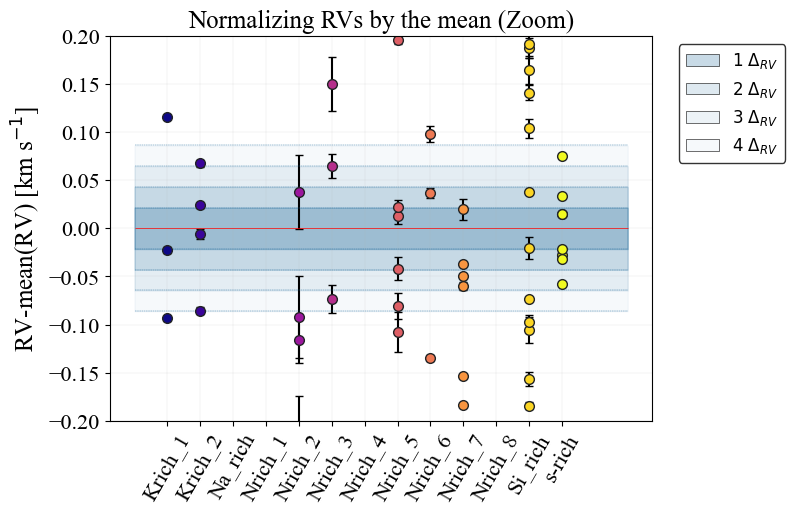

In [111]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]

fig = plt.figure(figsize=(7,5))

gs = fig.add_gridspec(1,1, hspace=0.4, wspace=0.)
(ax2) = gs.subplots()

ax2.fill_between(np.linspace(-1,14,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '$1~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '$2~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '$3~\Delta_{RV}$')
ax2.fill_between(np.linspace(-1,14,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '$4~\Delta_{RV}$')

for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    ax2.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=7, mew=1)
    

ax2.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
ax2.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax2.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax2.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0+4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax2.hlines(0-4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")

ax2.tick_params(axis='y', labelsize=16)  # Cambia el tamaño de los números en el eje Y

ax2.set_ylim(-0.2,0.2)
ax2.set_ylabel('RV-mean(RV) [km s$^{-1}$]' ,fontsize = 18)
ax2.set_title("Normalizing RVs by the mean (Zoom)",fontsize = 18)
ax2.set_xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=60,fontsize = 16)
ax2.grid(linestyle='-', linewidth=0.1)

legend2 = ax2.legend(bbox_to_anchor=(0.78, 0.5, 0.48, 0.5), fontsize=12, frameon=True, edgecolor='black')

# Modificar los bordes de cada recuadro en la leyenda
for patch in legend2.get_patches():
    patch.set_edgecolor("black")  # Cambia el borde a negro
    patch.set_linewidth(0.4)  # Ajusta el grosor del borde
    
plt.savefig("Imagen10_2.png", dpi=300, bbox_inches="tight")

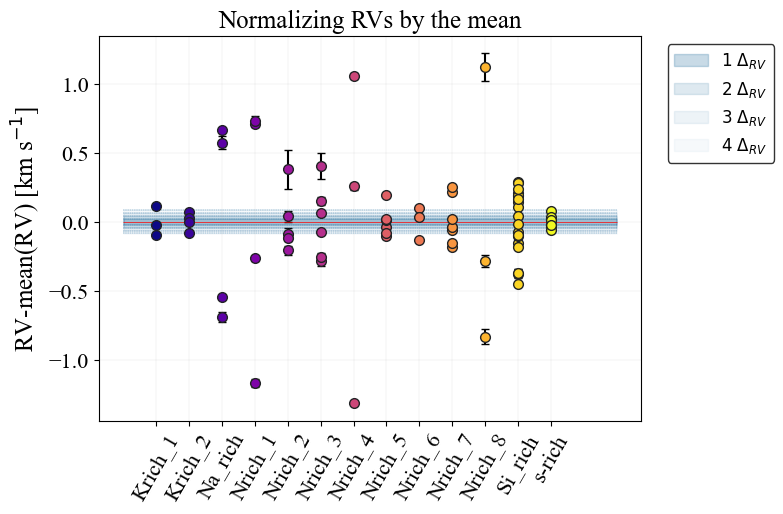

In [113]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]

fig = plt.figure(figsize=(7,5))

gs = fig.add_gridspec(1,1, hspace=0.4, wspace=0.)
(ax1) = gs.subplots()


ax1.fill_between(np.linspace(-1,14,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '$1~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '$2~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '$3~\Delta_{RV}$')
ax1.fill_between(np.linspace(-1,14,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '$4~\Delta_{RV}$')

for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    ax1.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=7, mew=1)
    

ax1.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
ax1.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax1.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
ax1.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0+4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
ax1.hlines(0-4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")

ax1.tick_params(axis='y', labelsize=16)  # Cambia el tamaño de los números en el eje Y

#plt.ylim(-0.2,0.2)
ax1.set_ylabel('RV-mean(RV) [km s$^{-1}$]' ,fontsize = 18)
ax1.set_title("Normalizing RVs by the mean",fontsize = 18)
ax1.set_xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=60,fontsize = 16)
ax1.grid(linestyle='-', linewidth=0.1)
legend1 = ax1.legend(bbox_to_anchor=(0.78, 0.5, 0.48, 0.5), fontsize=12, frameon=True, edgecolor='black')


plt.savefig("Imagen10_1.png", dpi=300, bbox_inches="tight")

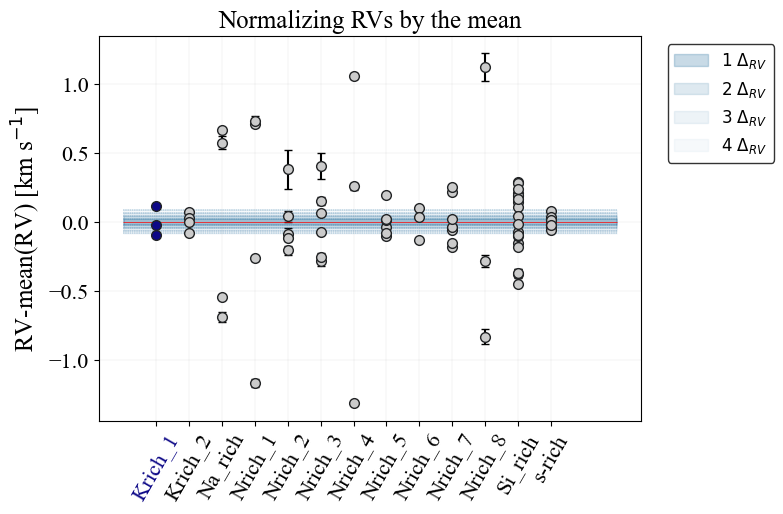

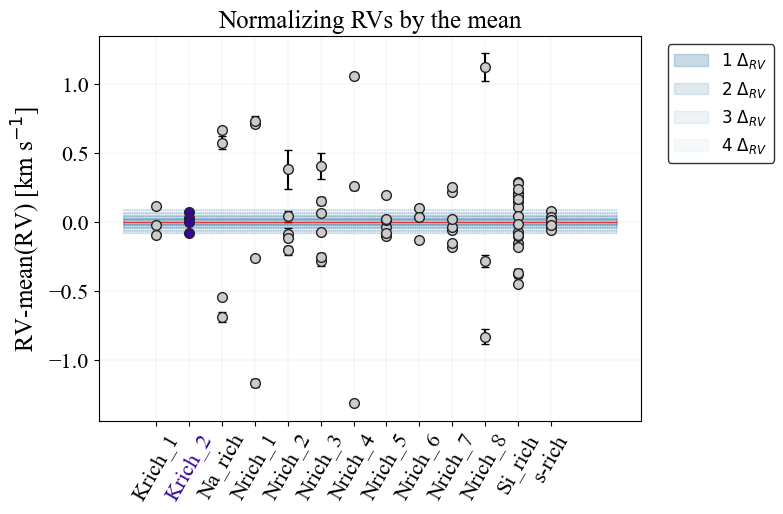

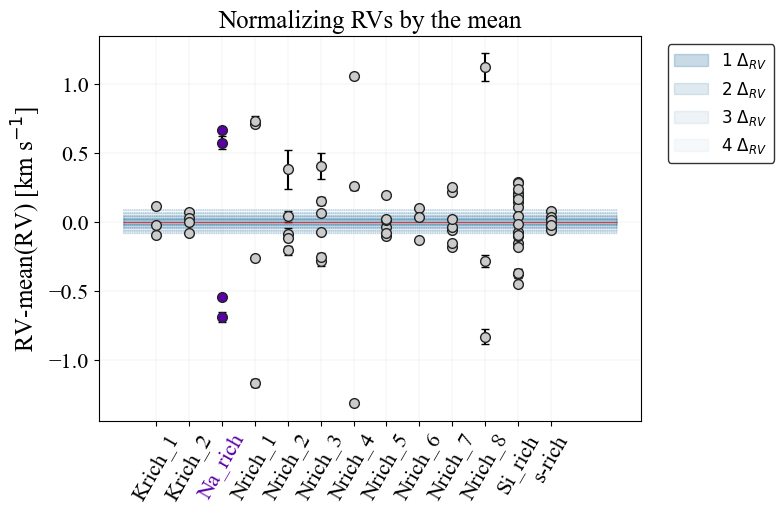

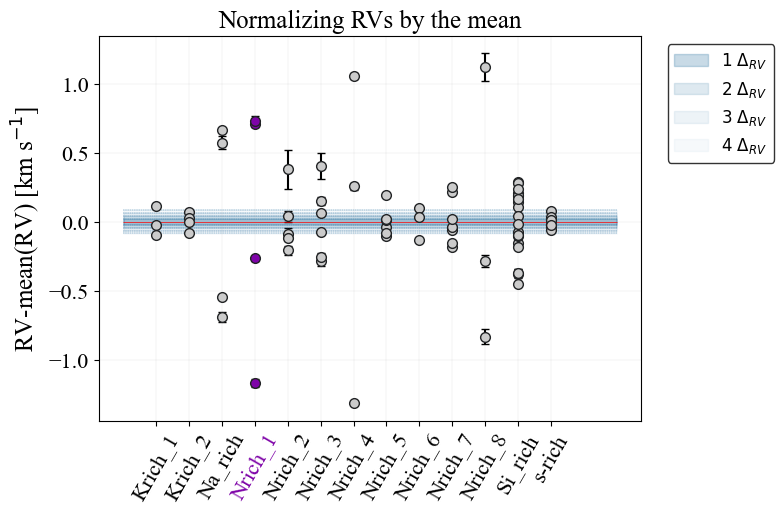

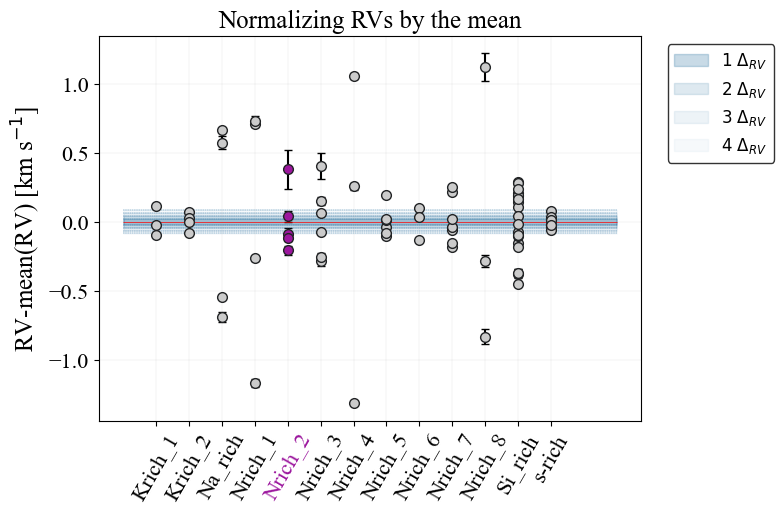

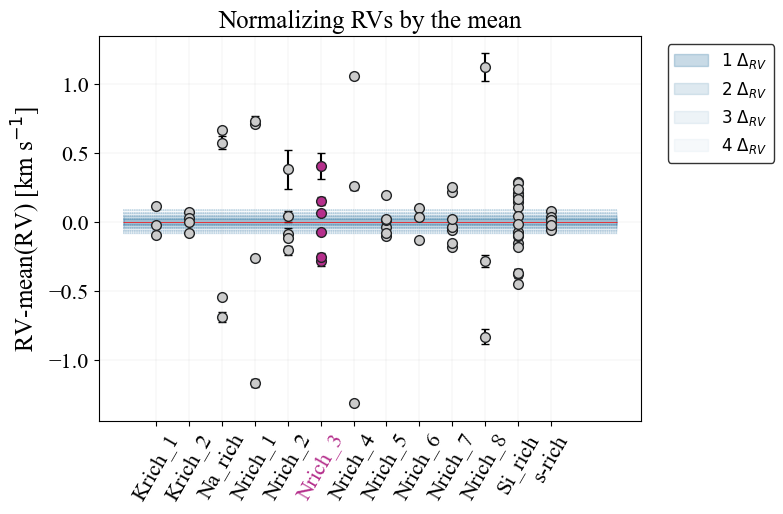

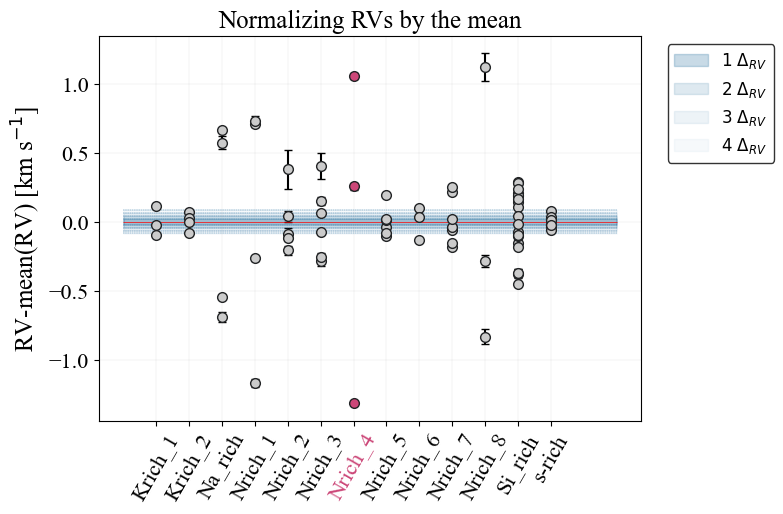

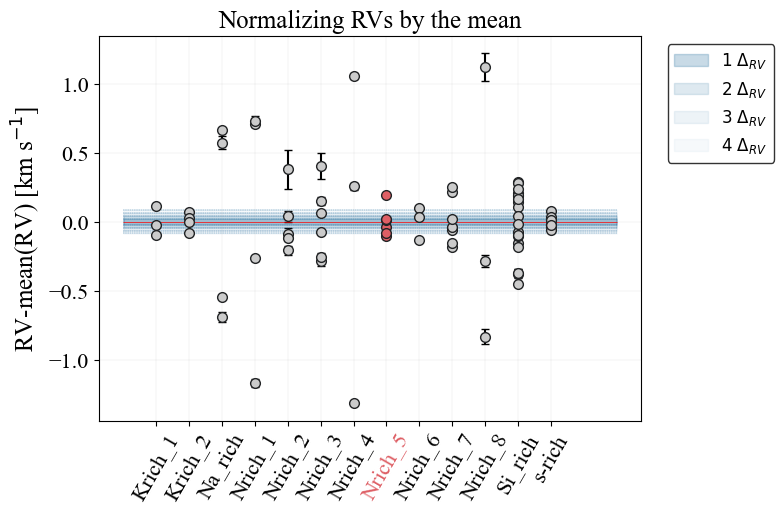

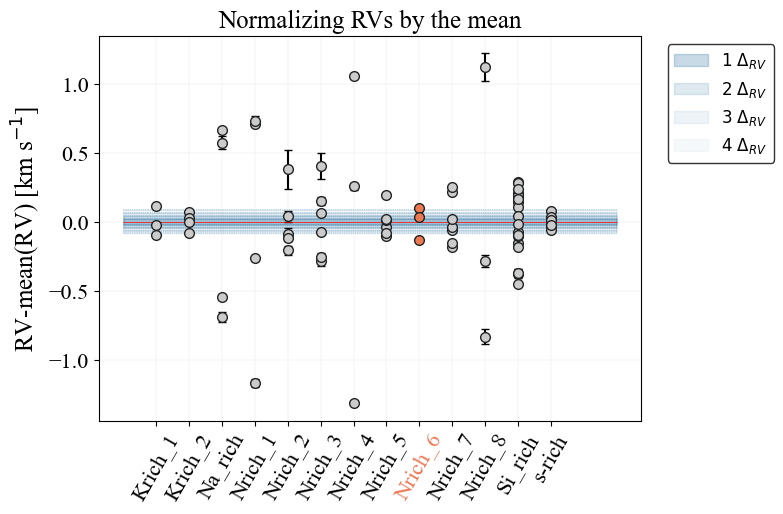

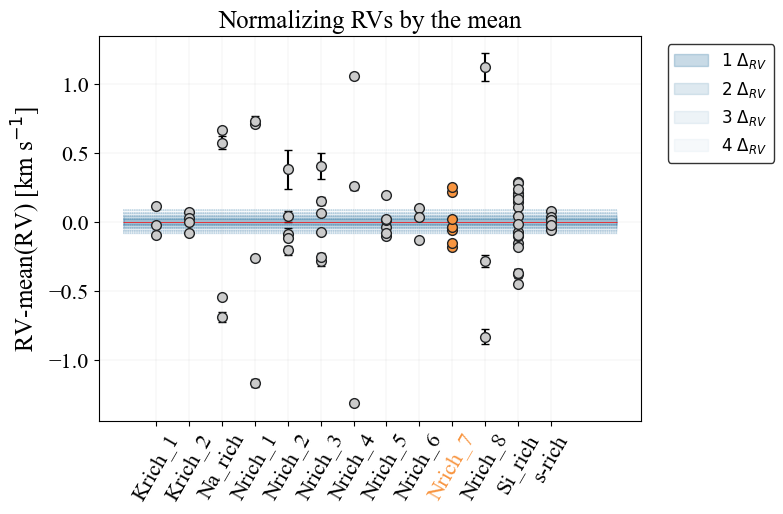

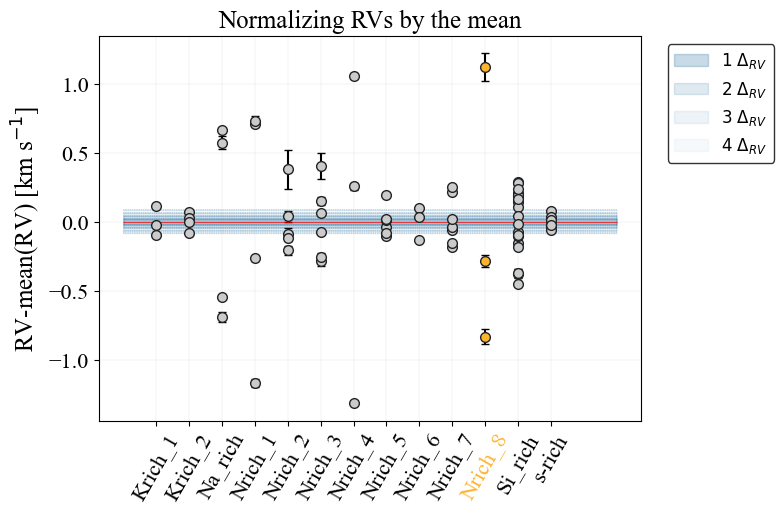

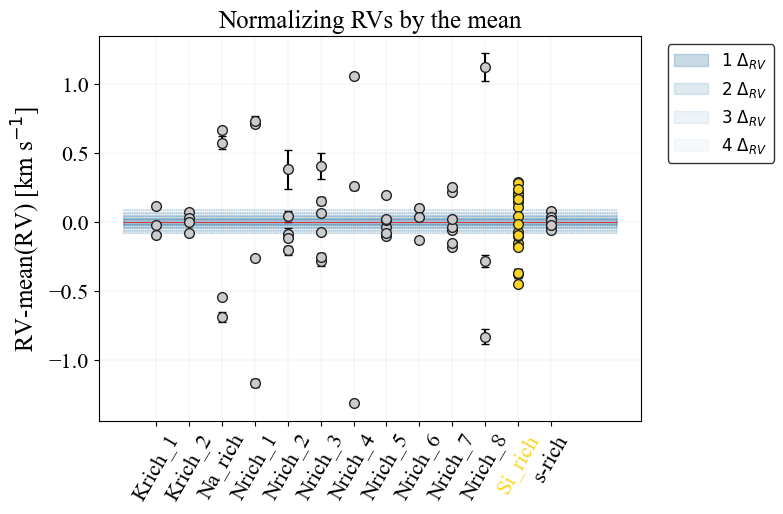

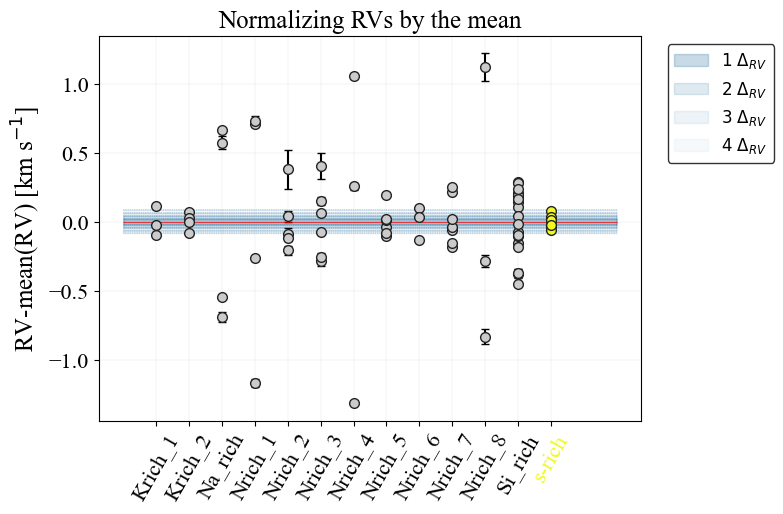

In [115]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for i in np.arange(len(data["Estrella"])): # Forma de llamar colores, de la paleta de colores

    cmap = plt.get_cmap('plasma')
    num_stars = len(all_df["Star"].unique())
    
    # Índice en el que quieres colocar el color de la paleta
    index = i  # Cambia esto según la posición deseada
    
    # Crear la lista de colores inicial completamente gris en formato hexadecimal
    colors = ["#cbcbcb"] * num_stars  # Gris en formato HEX
    colors2 = ["#000000"] * num_stars  # Gris en formato HEX
    
    # Reemplazar solo la posición deseada con el color de la paleta en HEX
    colors[index] = mcolors.to_hex(cmap(index / (num_stars - 1)))  # Normalizar el índice
    colors2[index] = mcolors.to_hex(cmap(index / (num_stars - 1)))  # Normalizar el índice
    
    
    fig = plt.figure(figsize=(7,5))
    
    gs = fig.add_gridspec(1,1, hspace=0.4, wspace=0.)
    (ax1) = gs.subplots()
    
    
    ax1.fill_between(np.linspace(-1,14,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '$1~\Delta_{RV}$')
    ax1.fill_between(np.linspace(-1,14,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '$2~\Delta_{RV}$')
    ax1.fill_between(np.linspace(-1,14,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '$3~\Delta_{RV}$')
    ax1.fill_between(np.linspace(-1,14,1000),np.array(-4*σ),np.array(4*σ),  color='#1A6799', alpha=0.04, label = '$4~\Delta_{RV}$')
    
    for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
        ax1.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=7, mew=1)
        
    
    ax1.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
    ax1.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
    ax1.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
    ax1.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    ax1.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    ax1.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    ax1.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    ax1.hlines(0+4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    ax1.hlines(0-4*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
    
    ax1.tick_params(axis='y', labelsize=16)  # Cambia el tamaño de los números en el eje Y
    
    #plt.ylim(-0.2,0.2)
    ax1.set_ylabel('RV-mean(RV) [km s$^{-1}$]' ,fontsize = 18)
    ax1.set_title("Normalizing RVs by the mean",fontsize = 18)
    
    # Configurar los ticks
    ax1.set_xticks(np.arange(len(data["Estrella"])))
    ax1.set_xticklabels(data["Estrella"], rotation=60, fontsize=16)
    
    # Cambiar el color de cada etiqueta manualmente
    for tick, color in zip(ax1.get_xticklabels(), colors2):
        tick.set_color(color)
        
    ax1.grid(linestyle='-', linewidth=0.1)
    legend1 = ax1.legend(bbox_to_anchor=(0.78, 0.5, 0.48, 0.5), fontsize=12, frameon=True, edgecolor='black')

    
    plt.savefig(f"Imagen10_1_{data["Estrella"][index]}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [116]:
for i in np.arange(len(data["Estrella"])): # Forma de llamar colores, de la paleta de colores
    print(data["Estrella"][i])

Krich_1
Krich_2
Na_rich
Nrich_1
Nrich_2
Nrich_3
Nrich_4
Nrich_5
Nrich_6
Nrich_7
Nrich_8
Si_rich
s-rich


In [117]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cmap = plt.get_cmap('plasma')
num_stars = len(all_df["Star"].unique())

# Índice en el que quieres colocar el color de la paleta
index = 2  # Cambia esto según la posición deseada

# Crear la lista de colores inicial completamente gris en formato hexadecimal
colors = ["#808080"] * num_stars  # Gris en formato HEX

# Reemplazar solo la posición deseada con el color de la paleta en HEX
colors[index] = mcolors.to_hex(cmap(index / (num_stars - 1)))  # Normalizar el índice

colors

['#808080',
 '#808080',
 '#5c01a6',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080']

In [121]:
all_df

,Date,RV,err_RV,Star,RV-mean(RV),err_RV-mean(err_RV)
0,2.459874e+06,12.9091,0.0347,K-1,-0.022567,-0.002800
1,2.459875e+06,13.0478,0.0379,K-1,0.116133,0.000400
2,2.459889e+06,12.8381,0.0399,K-1,-0.093567,0.002400
0,2.459837e+06,-11.8525,0.0195,K-2,-0.085475,0.003875
1,2.459860e+06,-11.6995,0.0193,K-2,0.067525,0.003675
...,...,...,...,...,...,...
3,2.459658e+06,315.5968,0.0136,s,0.033612,0.002237
4,2.459659e+06,315.5781,0.0091,s,0.014912,-0.002263
5,2.459662e+06,315.5318,0.0120,s,-0.031388,0.000637
6,2.459665e+06,315.5052,0.0102,s,-0.057988,-0.001163


In [123]:
len(all_df["Star"].unique()), len(data["Estrella"].unique())

(13, 13)

In [125]:
print("1σ = ",σ)
print("2σ = ",2*σ)
print("3σ = ",3*σ)
print("4σ = ",4*σ)

1σ =  0.02152055659668213
2σ =  0.04304111319336426
3σ =  0.06456166979004639
4σ =  0.08608222638672852


In [127]:
all_df[all_df['Star'].str.startswith('N-2')]["RV-mean(RV)"]

0   -0.20776
1   -0.09216
2    0.03744
3   -0.11596
4    0.37844
Name: RV-mean(RV), dtype: float64

In [129]:
N_datos = []
contador_variable = 0
N_variable = []
for i in ["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"]:
    N_datos.append(len(all_df[all_df['Star'].str.startswith(i)]["RV-mean(RV)"]))
print(N_datos)

for k in ["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"]:
    for j in np.arange(len(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"])):
        if (abs(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"][j]) > 0.2):
            contador_variable += 1
    N_variable.append(contador_variable)
    contador_variable = 0

contador_probable = 0
N_probable = []

for k in ["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"]:
    for j in np.arange(len(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"])):
        if (abs(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"][j]) > 4*σ and abs(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"][j]) < 0.2):
            contador_probable += 1
    N_probable.append(contador_probable)
    contador_probable = 0


contador_desconocido = 0
N_desconocido = []

for k in ["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"]:
    for j in np.arange(len(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"])):
        if (abs(all_df[all_df['Star'].str.startswith(k)]["RV-mean(RV)"][j]) < 4*σ ):
            contador_desconocido += 1
    N_desconocido.append(contador_desconocido)
    contador_desconocido = 0
    
print(N_variable)
print(N_probable)
print(N_desconocido)

porcentaje_variable = []
for i in np.arange(len(N_datos)):
    porcentaje_variable.append(round((N_variable[i]*100)/N_datos[i],2))
porcentaje_probable = []
for i in np.arange(len(N_datos)):
    porcentaje_probable.append(round((N_probable[i]*100)/N_datos[i],2))
porcentaje_desconocido = []

for i in np.arange(len(N_datos)):
    porcentaje_desconocido.append(round((N_desconocido[i]*100)/N_datos[i],2))

etiqueta = []
for i in np.arange(len(N_datos)):
    if (N_variable[i] != 0):
        etiqueta.append("Variable")
    elif (N_probable[i] != 0):
        etiqueta.append("Probable")
    else:
        etiqueta.append("Desconocido")
        
print(porcentaje_variable)
print(porcentaje_probable)
print(porcentaje_desconocido)
print(etiqueta)

[3, 4, 4, 4, 5, 6, 3, 6, 3, 8, 3, 19, 8]
[0, 0, 4, 4, 2, 3, 3, 0, 0, 2, 3, 7, 0]
[2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 9, 0]
[1, 4, 0, 0, 1, 2, 0, 4, 1, 4, 0, 3, 8]
[0.0, 0.0, 100.0, 100.0, 40.0, 50.0, 100.0, 0.0, 0.0, 25.0, 100.0, 36.84, 0.0]
[66.67, 0.0, 0.0, 0.0, 40.0, 16.67, 0.0, 33.33, 66.67, 25.0, 0.0, 47.37, 0.0]
[33.33, 100.0, 0.0, 0.0, 20.0, 33.33, 0.0, 66.67, 33.33, 50.0, 0.0, 15.79, 100.0]
['Probable', 'Desconocido', 'Variable', 'Variable', 'Variable', 'Variable', 'Variable', 'Probable', 'Probable', 'Variable', 'Variable', 'Variable', 'Desconocido']


In [131]:
# Definir una función que aplica estilos a columnas específicas con colores diferentes
def highlight_greaterthan_1(s):
    if s.Etiqueta == "Variable":
        return ['background-color: #EDBCFF']*6
    elif s.Etiqueta == "Probable":
        return ['background-color: #FEFFBC']*6
    elif s.Etiqueta == "Desconocido":
        return ['background-color: #F6F6F6']*6

In [133]:
tabla = pd.DataFrame()
tabla["Estrella"] = data["Estrella"]
tabla["N° de datos"] = N_datos
tabla[">0.2"] = N_variable
#tabla[">0.2 [%]"] = porcentaje_variable
tabla["4σ-0.2"] = N_probable
#tabla["4σ-0.2 [%]"] = porcentaje_probable
tabla["<4σ"] = N_desconocido
#tabla["<4σ [%]"] = porcentaje_desconocido
tabla["Etiqueta"] = etiqueta

tabla.style.apply(highlight_greaterthan_1, axis=1)

,Estrella,N° de datos,>0.2,4σ-0.2,<4σ,Etiqueta
0,Krich_1,3,0,2,1,Probable
1,Krich_2,4,0,0,4,Desconocido
2,Na_rich,4,4,0,0,Variable
3,Nrich_1,4,4,0,0,Variable
4,Nrich_2,5,2,2,1,Variable
5,Nrich_3,6,3,1,2,Variable
6,Nrich_4,3,3,0,0,Variable
7,Nrich_5,6,0,2,4,Probable
8,Nrich_6,3,0,2,1,Probable
9,Nrich_7,8,2,2,4,Variable


In [135]:
# Obtén la ruta absoluta
rutas = ['news_RV/Nrich1_2M01575297-0316508.csv','news_RV/Nrich2_2M05120630-5913438.csv','news_RV/Nrich3_2M10022398+0216045.csv',
        'news_RV/Nrich4_2M10071742+0605101.csv','news_RV/Nrich5_2M11173689+0645217.csv','news_RV/Nrich6_2M18461977-3021506.csv',
        'news_RV/Nrich7_2M23513172-0312308.csv','news_RV/Nrich8_2M06040390-5600065.csv','news_RV/Sirich_2M22045404-1148287.csv',]
mean_rv_APOGEE = []
mean_rv_err_APOGEE = []

for i in np.arange(len(rutas)):
    file_path = os.path.abspath(rutas[i])
    print(file_path)
    
    # Luego intenta leer el archivo
    df = pd.read_csv(file_path)
    df_ordenado = df.sort_values(by='JD')
    df_ordenado = df_ordenado[df_ordenado['STARFLAG']==0].reset_index(drop=True)
    df_ordenado
    rv=np.array(df_ordenado["VHELIO"])
    rv_err=np.array(df_ordenado["VRELERR"])
    mean_rv_APOGEE.append(np.mean(rv))
    mean_rv_err_APOGEE.append(np.mean(rv_err))

C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich1_2M01575297-0316508.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich2_2M05120630-5913438.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich3_2M10022398+0216045.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich4_2M10071742+0605101.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich5_2M11173689+0645217.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich6_2M18461977-3021506.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich7_2M23513172-0312308.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Nrich8_2M06040390-5600065.csv
C:\Users\Alexander\Desktop\Docs_Jupyter\9.Joven_Investigador\Nrich\news_RV\Sirich_2M22045404-1148287.csv


In [137]:
mean_rv_APOGEE, mean_rv_err_APOGEE

([156.34060998164648,
  49.36176300048828,
  96.29593463454557,
  -16.26789993887065,
  nan,
  nan,
  -70.23849487304688,
  96.36078643798828,
  -172.2385811550528],
 [0.02988233397701345,
  0.0238539930433034,
  0.027129776916164,
  0.036825853786975934,
  nan,
  nan,
  0.0229701772332191,
  0.029129434376955,
  0.0366266258776576])

###  Agregando nuevos datos de velocidad radial a ver como se comportan

In [140]:
# Nuevos datos

Nrich_1 = pd.DataFrame()
Nrich_1["Database"] = ["Apogee DR16","Apogee DR17","Apogee DR17", "RV-Rave"]
Nrich_1["RV"] = [143.765,156.33643,138.35522,149.552]
Nrich_1["err_RV"] = [0.052,0.02856381,0.02476155,1.932]

Nrich_2 = pd.DataFrame()
Nrich_2["Database"] = ["Apogee DR17", "RV-Rave"]
Nrich_2["RV"] = [49.361763,51.351]
Nrich_2["err_RV"] = [0.023853993,0.53]

Nrich_3 = pd.DataFrame()
Nrich_3["Database"] = ["Apogee DR17"]
Nrich_3["RV"] = [96.29422]
Nrich_3["err_RV"] = [0.025129532]

Nrich_4 = pd.DataFrame()
Nrich_4["Database"] = ["Apogee DR17"]
Nrich_4["RV"] = [-16.259817]
Nrich_4["err_RV"] = [0.08375658]

Nrich_5 = pd.DataFrame()
Nrich_5["Database"] = ["Apogee DR16","Apogee DR17"]
Nrich_5["RV"] = [3.922,3.8724477]
Nrich_5["err_RV"] = [0.047,0.09697314]

Nrich_6 = pd.DataFrame()
Nrich_6["Database"] = ["Apogee DR16","Apogee DR17"]
Nrich_6["RV"] = [-225.934,-226.08293]
Nrich_6["err_RV"] = [0.034,0.026238838]

Nrich_7 = pd.DataFrame()
Nrich_7["Database"] = ["Apogee DR17","RV-Rave"]
Nrich_7["RV"] = [-70.238495,-70.385]
Nrich_7["err_RV"] = [0.022970177,0.559]

Nrich_8 = pd.DataFrame()
Nrich_8["Database"] = ["Apogee DR17","RV-Rave"]
Nrich_8["RV"] = [96.36079,97.047]
Nrich_8["err_RV"] = [0.029129434,0.778]

Si_rich = pd.DataFrame()
Si_rich["Database"] = ["Apogee DR16","Apogee DR17"]
Si_rich["RV"] =  [-172.678,-172.38957]
Si_rich["err_RV"] = [0.064,0.03425204]

In [142]:
Krich_1 = pd.DataFrame()
Krich_1["Database"] = []
Krich_1["RV"] = []
Krich_1["err_RV"] = []

Krich_2 = pd.DataFrame()
Krich_2["Database"] = []
Krich_2["RV"] = []
Krich_2["err_RV"] = []

Narich = pd.DataFrame()
Narich["Database"] = []
Narich["RV"] = []
Narich["err_RV"] = []

s_rich = pd.DataFrame()
s_rich["Database"] = []
s_rich["RV"] = []
s_rich["err_RV"] = []

dfs_news = [Krich_1,Krich_2,Narich,Nrich_1,Nrich_2,Nrich_3,Nrich_4,Nrich_5,Nrich_6,Nrich_7,Nrich_8,Si_rich,s_rich]

In [144]:
for i,j,k in zip(dfs_news,["K-1","K-2","Na","N-1","N-2","N-3","N-4","N-5","N-6","N-7","N-8","Si","s"],dfs):
    i["Star"] = j
    i["RV-mean(RV)"] = i["RV"]-np.mean(k["RV"])
    i["err_RV-mean(err_RV)"] = i["err_RV"]-np.mean(i["err_RV"])

In [146]:
dfs_news[3]

,Database,RV,err_RV,Star,RV-mean(RV),err_RV-mean(err_RV)
0,Apogee DR16,143.76500,0.052000,N-1,-4.51135,-0.457331
1,Apogee DR17,156.33643,0.028564,N-1,8.06008,-0.480768
2,Apogee DR17,138.35522,0.024762,N-1,-9.92113,-0.484570
3,RV-Rave,149.55200,1.932000,N-1,1.27565,1.422669


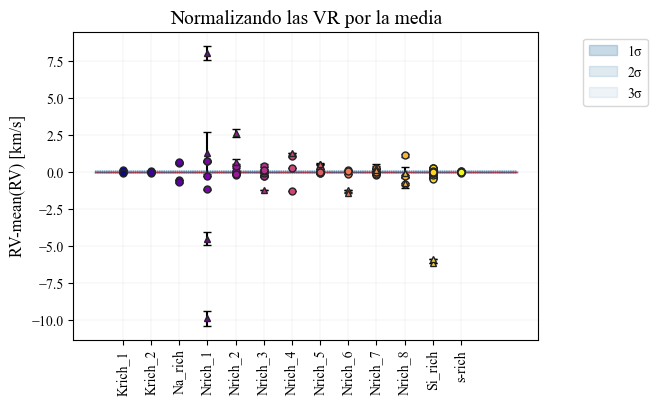

In [148]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]

plt.figure(figsize=(6,4))
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '1σ')
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '2σ')
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '3σ')

for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    plt.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=5, mew=1)
    if not dfs_news[i]['RV-mean(RV)'].empty:
        plt.errorbar(x = [i]*len(dfs_news[i]["RV-mean(RV)"]),y = dfs_news[i]["RV-mean(RV)"],  yerr = abs(dfs_news[i]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="^",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=5, mew=1)


plt.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
plt.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")


#plt.ylim(-1.5,1.5)
plt.ylabel('RV-mean(RV) [km/s]' ,fontsize = 12)
plt.title("Normalizando las VR por la media",fontsize = 14)
plt.xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=90)
plt.grid(linestyle='-', linewidth=0.1)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.45, 0.5))
plt.show()

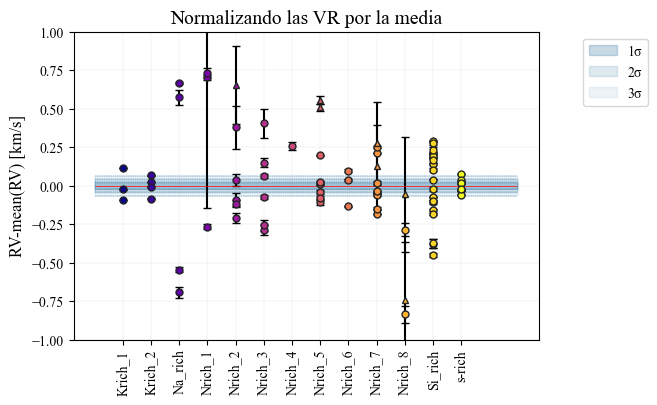

In [150]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(all_df["Star"].unique()))]

plt.figure(figsize=(6,4))
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-1*σ),np.array(1*σ),  color='#1A6799', alpha=0.24, label = '1σ')
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-2*σ),np.array(2*σ),  color='#1A6799', alpha=0.14, label = '2σ')
plt.fill_between(np.linspace(0-1,13+1,1000),np.array(-3*σ),np.array(3*σ),  color='#1A6799', alpha=0.08, label = '3σ')


for i,j in zip(np.arange(len(data["Estrella"])),all_df["Star"].unique()):
    plt.errorbar(x = [i]*len(all_df[all_df['Star'].str.startswith(j)]["Date"]),y = all_df[all_df['Star'].str.startswith(j)]["RV-mean(RV)"],  yerr = abs(all_df[all_df['Star'].str.startswith(j)]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=5, mew=1)
    if not dfs_news[i]['RV-mean(RV)'].empty:
        plt.errorbar(x = [i]*len(dfs_news[i]["RV-mean(RV)"]),y = dfs_news[i]["RV-mean(RV)"],  yerr = abs(dfs_news[i]["err_RV-mean(err_RV)"]), linestyle="None",  fmt="^",  capsize=3,  ecolor="k", mfc=colors[i],mec='#212325', ms=5, mew=1)


plt.hlines(0,0-1,13+1,ls = "-",lw = 0.5,color = "r")
plt.hlines(0+σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0-σ,0-1,13+1, ls = "--",lw = 0.3,color = "#1A6799")
plt.hlines(0+2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-2*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0+3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")
plt.hlines(0-3*σ,0-1,13+1, ls = "--", lw = 0.3, color = "#1A6799")


#plt.ylim(-1.5,1.5)
plt.ylabel('RV-mean(RV) [km/s]' ,fontsize = 12)
plt.title("Normalizando las VR por la media",fontsize = 14)
plt.xticks(np.arange(len( data["Estrella"])), data["Estrella"], rotation=90)
plt.ylim(-1,1)
plt.grid(linestyle='-', linewidth=0.1)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.45, 0.5))
plt.show()

In [152]:
all_df["Star"].unique()

array(['K-1', 'K-2', 'Na', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6',
       'N-7', 'N-8', 'Si', 's'], dtype=object)

In [154]:
[0]*len(all_df[all_df['Star'].str.startswith('N-1')]["Date"]), all_df[all_df['Star'].str.startswith('N-1')]["RV-mean(RV)"]

([0, 0, 0, 0],
 0   -1.16895
 1   -0.26615
 2    0.70495
 3    0.73015
 Name: RV-mean(RV), dtype: float64)

### Resumen de resultados obtenidos para las estrellas a $3\sigma$ y $2\sigma$ de la distribución

<div style="text-align: justify;">

| Estrellas | T [tiempos ejecución] [s] | N [número épocas] | M [número posteriors] | Observaciones | P [días] | e | K [m/s] | M [M_sol] |
| --- | --- | --- | --- | --- | --- | --- | ---|---|
| Na-rich | $2655.827 \approx 44.26 \text{ min}$ | $4 $| $894909 $| Existen demasiados periodos distribuidos entre los 2 días hasta los casi 3000 días (no hay una tendencia muy marcada) | | | | |
|Nrich-1|$2534.220 \approx 42.24 \text{ min}$ | $8 $| $1$ | El resultado es unimodal, por tanto se procede con el cálculo por MCMC, donde se encuentran parámetros muy marcados. Es la estrella con la que con mayor certeza podemos decir que es una binaria.| $283.211$ | $0.815$ |$ 24053.306$ | $0.515 \approx 540.32 ~ M_J$ |
|Nrich-2| $2527.742 \approx 42.13 \text{ min}$ |$ 6 $| $554 $| El resultado es multimodal, pero hay uno periodo específico que resalta sobre los demás, los puntos están puestos en diferentes lugares de la órbita [se ve en la fase].| $42.771$ | $0.071$ | $661.958$ | $0.009 \approx 9.86 ~M_J$|
|Nrich-3 | $2531.026 \approx 42.18 \text{ min}$  |$ 8$ | $10691$ | Existen muchos periodos dispersos, especialmente mayores a 1000 días, sin embargo se puede reconocer un pico bastante pronunciado respecto a los demás. Los puntos están más o menos distribuidos en la órbita. Sin embargo faltan lugares de la órbita por muestrear. | $613.184$ | $0.056$ |$ 886.093 $| $0.031 \approx 32.69 ~ M_J$|
|Nrich-4 | $2483.616 \approx 41.39 \text{ min}$  |$ 6$ | $504$ | El resultado es multimodal, con tendencias en periodos muy centradas, sin embargo es díficil elegir un periodo más representativo respecto a los demás, por esto se presentan las 5 posibilidades de curva que resultan y se hace el cálculo con el periodo que destaca un poco más que los demás. Los puntos aparecen concentrados casi en el mismo lugar de la fase. | $344.272$ | $0.519$ |$ 4493.023 $| $0.119 \approx 125.25 ~ M_J$|
|Nrich-7 | $2570.604 \approx 42.84 \text{ min}$  |$ 9$ | $159$ | El resultado muestra un periodo bastante representativo respecto a los demás. Los puntos están distribuidos en aproximadamente toda la órbita. | $12.207$ | $0.168$ |$ 217.296 $| $0.002 \approx 2.09 ~ M_J$|
|Nrich-8 | $2564.560 \approx 42.74 \text{ min}$ |$ 4$ | $2386$ | El resultado muestra muchos periodos, pero en princio están ubicados entre 2 y 50 días. Ahí se muestra algo muy multimodal y con densidades de puntos grandes para cada conjuntos de periodos, lo que hace díficil identificar un periodo respecto a los demás, sin embargo se muestrea respecto al que se encuentra más denso y compacto. | $16.746$ | $0.112$ |$ 1109.685 $| $0.012 \approx 12.075 ~ M_J$|
|Si-rich |$2890.411 \approx 48.17 \text{ min}$  |$ 20$ | $431$ | El resultado es multimodal, pero no es muy disperso respecto a cada periodo significativo, hay un sector de periodos que destacan de los demás. Los puntos se encuentran en dos zonas específicas de la órbita, siendo el máximo y mínimo de la misma. | $496.579$ | $0.196$ |$ 3008.588 $| $0.102 \approx 107.33 ~ M_J$|

</div>

In [158]:
# Lista para almacenar los DataFrames
dataframes = []

# Lista de rutas de los archivos
rutas = ['Mass_dist_Narich.csv', 'Mass_dist_Nrich1.csv', 'Mass_dist_Nrich2.csv', 
         'Mass_dist_Nrich3.csv', 'Mass_dist_Nrich4.csv', 'Mass_dist_Nrich7.csv', 
         'Mass_dist_Nrich8.csv', 'Mass_dist_Sirich.csv']
nombres = ["Na-rich","Nrich 1","Nrich 2","Nrich 3","Nrich 4","Nrich 7","Nrich 8","Si-rich"]
# Leer cada archivo y guardarlo en la lista
for ruta,i in zip(rutas,nombres):
    df = pd.read_csv(ruta, header=None, names=['Mass'])
    df['Archivo'] = f'{i}'  # Añadir una columna para identificar el archivo
    dataframes.append(df)
    
# Acceso a los DataFrames: dataframes[0] será archivo1, dataframes[1] será archivo2, etc.
dataframes[1]

,Mass,Archivo
0,0.465206,Nrich 1
1,0.454932,Nrich 1
2,0.444480,Nrich 1
3,0.444438,Nrich 1
4,0.543688,Nrich 1
...,...,...
239,0.514765,Nrich 1
240,0.514352,Nrich 1
241,0.515165,Nrich 1
242,0.514689,Nrich 1


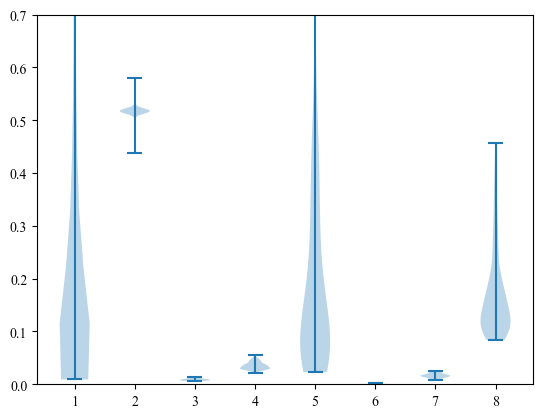

In [160]:
# Semilla para reproducibilidad
np.random.seed(5)

# Simulación de datos (tres grupos)
X =(dataframes[0]["Mass"], dataframes[1]["Mass"], dataframes[2]["Mass"], dataframes[3]["Mass"],
   dataframes[4]["Mass"], dataframes[5]["Mass"], dataframes[6]["Mass"], dataframes[7]["Mass"])

# Gráfico de violín por grupo
fig, ax = plt.subplots()
ax.violinplot(X)
plt.ylim(0,0.7)
plt.show()

In [162]:
# Configurar el estilo de fuente global a 'serif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Palatino', 'Charter', 'serif']

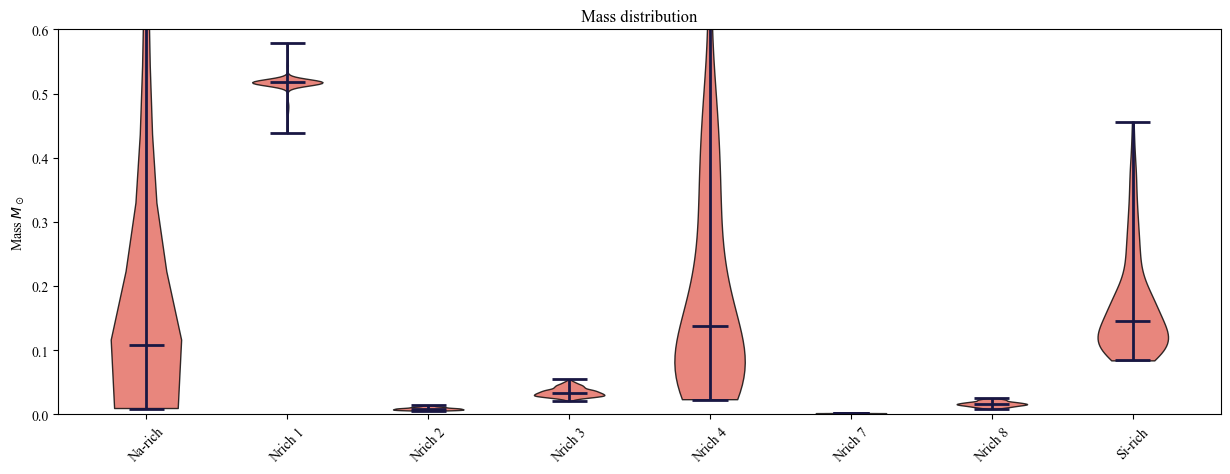

In [164]:
fig, ax = plt.subplots(figsize=(15, 5))

# Crear el gráfico de violín
violin_parts = ax.violinplot(X, showmeans=False, showmedians=True, showextrema=True)

# Personalizar el gráfico de violín
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor("#191743")
    vp.set_linewidth(2)

for vp in violin_parts['bodies']:
    vp.set_facecolor("#e3685c")
    vp.set_edgecolor('k')
    vp.set_alpha(0.8)
    vp.set_linewidth(1)
    
# Personalizar la línea de la mediana
violin_parts['cmedians'].set_color('#191743')  # Cambiar el color de la mediana
violin_parts['cmedians'].set_linewidth(2)   # Cambiar el grosor de la línea de la mediana

# Personalizar el eje y etiquetas
ax.set_ylabel('Mass $M_\odot$')
ax.set_title('Mass distribution')
nombres = ["Na-rich","Nrich 1","Nrich 2","Nrich 3","Nrich 4","Nrich 7","Nrich 8","Si-rich"]
ax.set_xticks(np.arange(1, len(nombres) + 1))
ax.set_xticklabels(nombres, rotation=45)
plt.ylim(0,0.6)
plt.show()

 0.07261^{+0.35181}_{-0.04812}
 0.51744^{+0.00209}_{-0.00241}
 0.00775^{+0.00342}_{-0.00088}
 0.03033^{+0.01267}_{-0.00209}
 0.08198^{+0.31664}_{-0.03572}
 0.00197^{+0.00014}_{-0.00005}
 0.01600^{+0.00470}_{-0.00344}
 0.11996^{+0.12982}_{-0.01647}


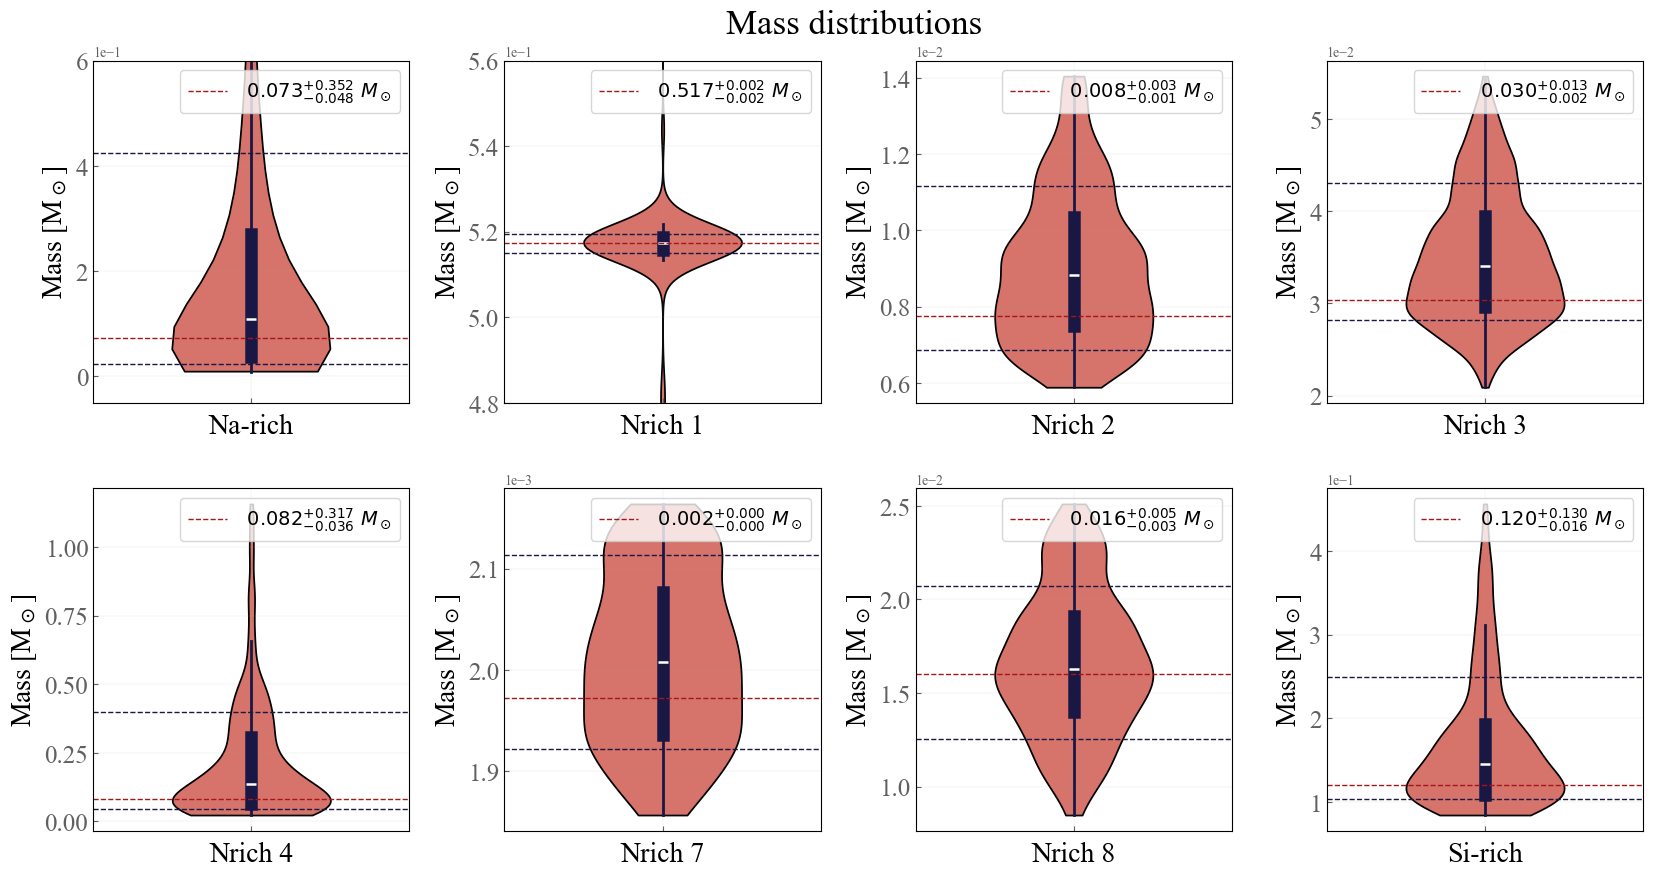

In [238]:

fig = plt.figure(figsize=(20,10))

gs = fig.add_gridspec(2, 4, hspace=0.25, wspace=0.3)
(ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8) = gs.subplots(sharey = False, sharex = False)

ax2.text(2, 1.15, "Mass distributions\n", transform=ax1.transAxes, fontsize = 25, verticalalignment='top', horizontalalignment='left')

ax1.set_ylim(-0.05,0.6)
ax2.set_ylim(4.8e-1,5.6e-1)

for ax,i in zip(fig.get_axes(),np.arange(len(dataframes))):
    ax.set_xlabel(nombres[i], fontsize = 20)
    
    ax.set_ylabel("Mass [M$_\odot$]", fontsize = 20)
    sns.violinplot(y = abs(np.array(dataframes[i]["Mass"])),inner_kws=dict(box_width=9, whis_width=2, color="#191743"),
               color = "#e3685c",saturation=0.8, fill=True, inner='box', split=False, width=0.5,
               dodge='auto', gap=0,density_norm='area',common_norm=False, bw_adjust=0.85,
              linecolor='k', cut=0, gridsize=250, native_scale=False, ax=ax)
    
    # Calcula la densidad de la distribución
    density = gaussian_kde(dataframes[i]["Mass"])
    
    # Encuentra el rango de valores en el eje y
    y_values = np.linspace(min(dataframes[i]["Mass"]), max(dataframes[i]["Mass"]), 1000)
    
    # Evalúa la densidad en el rango de valores en el eje y
    density_values = density(y_values)
    
    # Encuentra el índice del máximo valor de densidad
    peak_index = np.argmax(density_values)
    
    # Encuentra el valor en el eje y correspondiente al pico
    peak_value = y_values[peak_index]
    percentile_16_mass = np.percentile(np.array(dataframes[i]["Mass"]), 16)
    percentile_84_mass = np.percentile(np.array(dataframes[i]["Mass"]), 84)
    
    # Calcular el error estimado (asimétrico)
    error_lower_mass = (peak_value - percentile_16_mass)
    error_upper_mass = (percentile_84_mass - peak_value)
    
    #print("El pico más alto de la distribución está en:", peak_value)
    #ax.text("Mass distribution"+f" ${round(peak_value,3)}^{{+{round(abs(error_upper_mass),3)}}}_{{-{round(abs(error_lower_mass),3)}}}$ \n {nombres[i]}", fontsize = 14)
    # ax.text(0.05, 0.95, f" ${peak_value:.3f}^{{+{abs(error_upper_mass):.3f}}}_{{-{abs(error_lower_mass):.3f}}}$", transform=ax.transAxes, fontsize = 12, verticalalignment='top', horizontalalignment='left', fontstyle = 'italic')

    #plt.axhline(y=M2.value, color='#D0D3D4', linestyle='--',linewidth = 1, label = f'$M_2$ = { round(float(M2.value),3)} $M_\odot$')
    ax.axhline(y=peak_value, color='#a4161a', linestyle='--',linewidth = 1, label = f" ${peak_value:.3f}^{{+{abs(error_upper_mass):.3f}}}_{{-{abs(error_lower_mass):.3f}}} ~ M_\odot$")
    ax.axhline(peak_value-abs(error_lower_mass), color='#191743', linestyle='dashed', linewidth=1)
    ax.axhline(peak_value+abs(error_upper_mass), color='#191743', linestyle='dashed', linewidth=1)

    ax.tick_params(axis='both', labelsize=18,  direction="in", colors = "#605f61")  # Aumenta el tamaño de los números en ambos ejes
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # Agregar una línea vertical en el pico más alto
    
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend(fontsize = 14, loc = 'upper right')

    print(f" {peak_value:.5f}^{{+{abs(error_upper_mass):.5f}}}_{{-{abs(error_lower_mass):.5f}}}")

plt.savefig(f"All_Mass_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [76]:
for i in np.arange(len(dataframes)):
    print(f" {round(peak_value,5)}^{{+{round(abs(error_upper_mass),5)}}}_{{-{round(abs(error_lower_mass),5)}}}")

 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
 0.11996^{+0.12982}_{-0.01647}
